In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
paths = ['pics/v1', 'pics/v2', 'pics/v3']
titles = ['PV-Wind-BESS', 'Hydro-BESS-SC', 'Hydro-Wind-BESS-SC']
my_names = [x.split('-') for x in titles]
services = ['FCR', 'FFR', 'FFR-FCR', 'FCR-D']

Running for  PV-Wind-BESS
Running for  Hydro-BESS-SC
Running for  Hydro-Wind-BESS-SC


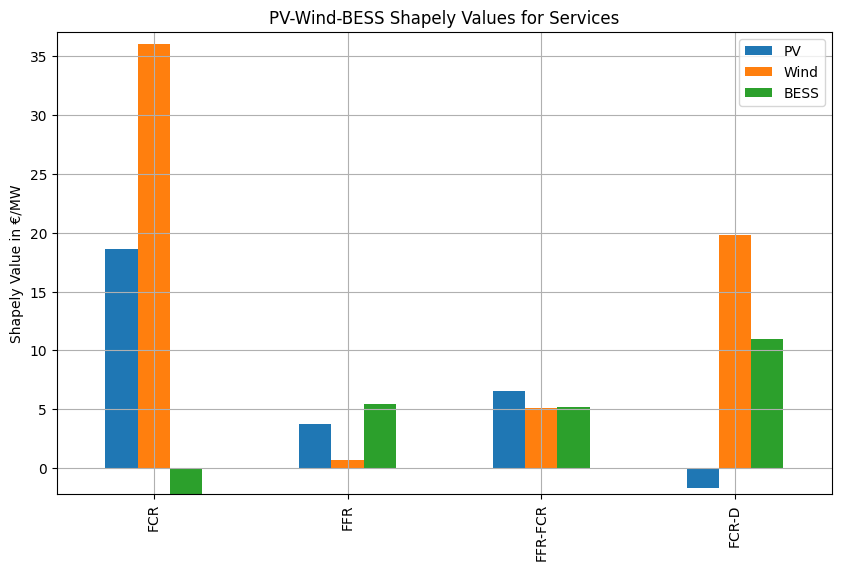

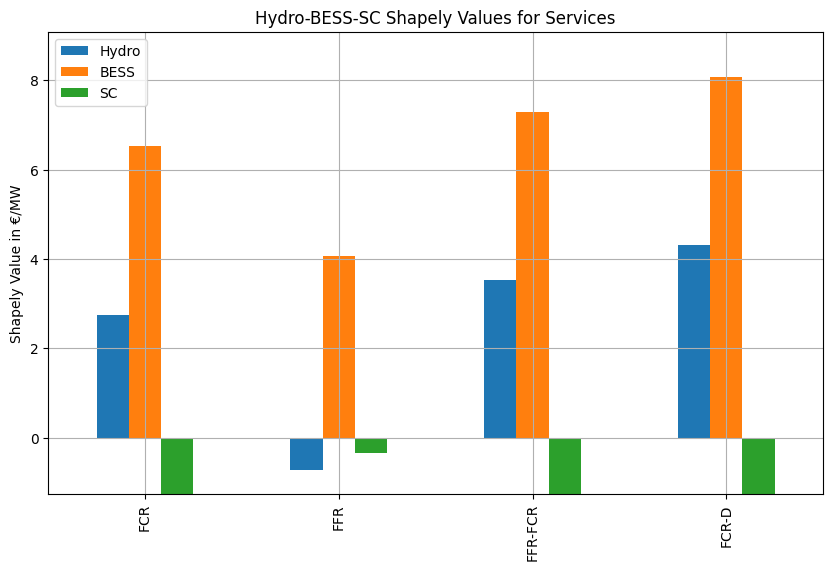

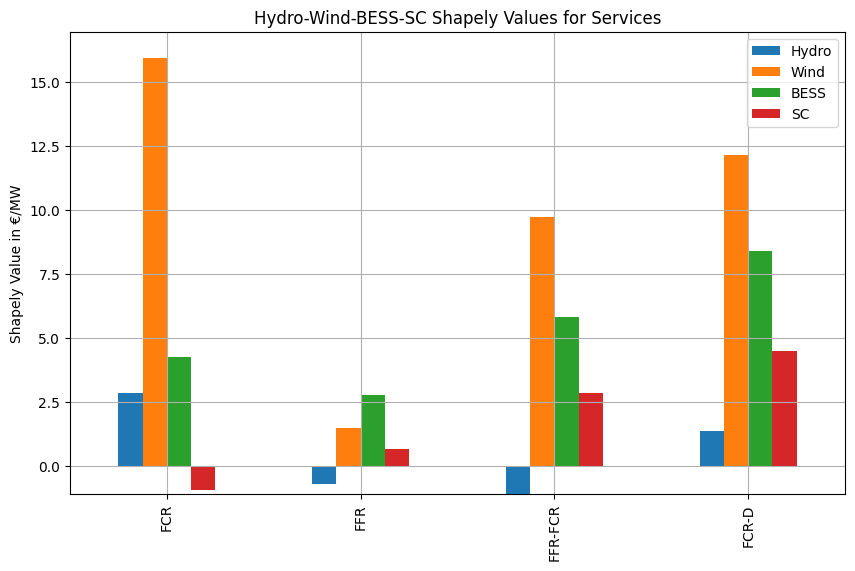

In [28]:
for path, tit, ma_name in zip(paths, titles, my_names):
    print('Running for ', tit)
    df_tot = pd.DataFrame(index=services, columns=ma_name)
    for service in services:
        # do same for reward and shapely values values
        subpath = service.replace('-','_')
        try:
            df = pd.read_csv(f'{path}/{subpath}/shapely_values_{service}.csv', index_col=0)
        except:
            continue
        # df = df.groupby(df.index).first()
        # df = df.transpose()
        # df.sort_index(axis=1, inplace=True)
        if len(df)>1:
            # take mean and insert in df_tot
            df_tot.loc[service] = df.mean(axis=0)
            # add std.
            # df_tot.loc[service + '_std'] = df.std(axis=0)
        else:
            df_tot.loc[service] = df.iloc[0]
        # change lables
    df_tot.plot(
            kind='bar', figsize=(10, 6),
            title=f'{tit} Shapely Values for Services', ylabel='Shapely Value in €/MW')
    plt.grid()
    plt.ylim(df_tot.min().min(), df_tot.max().max()+1)

In [ ]:
path = 'pics/DVPP2'
services = ['FCR', 'FFR', 'FFR_FCR', 'FCR_D']
# df = pd.read_csv('data/energy_provision.csv', index_col=0)
service = services[0]

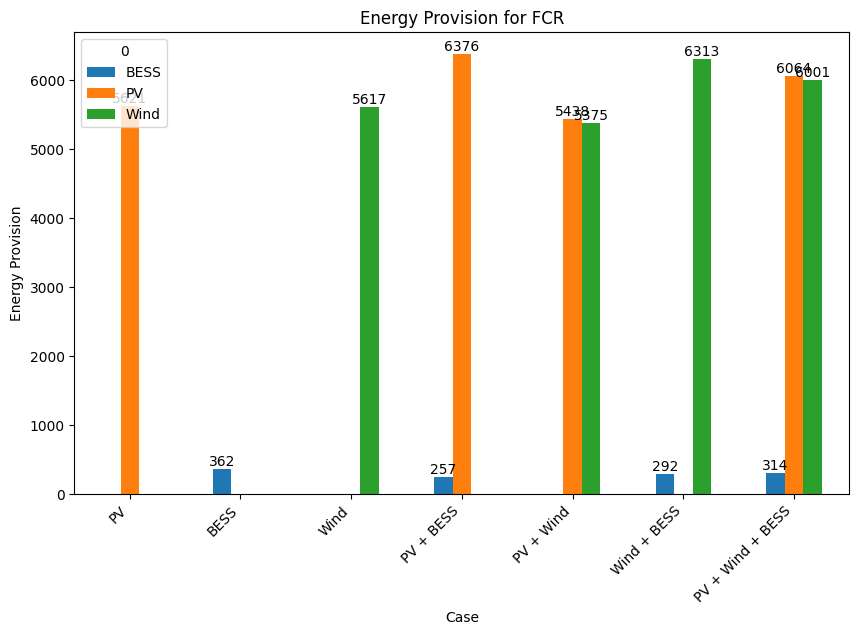

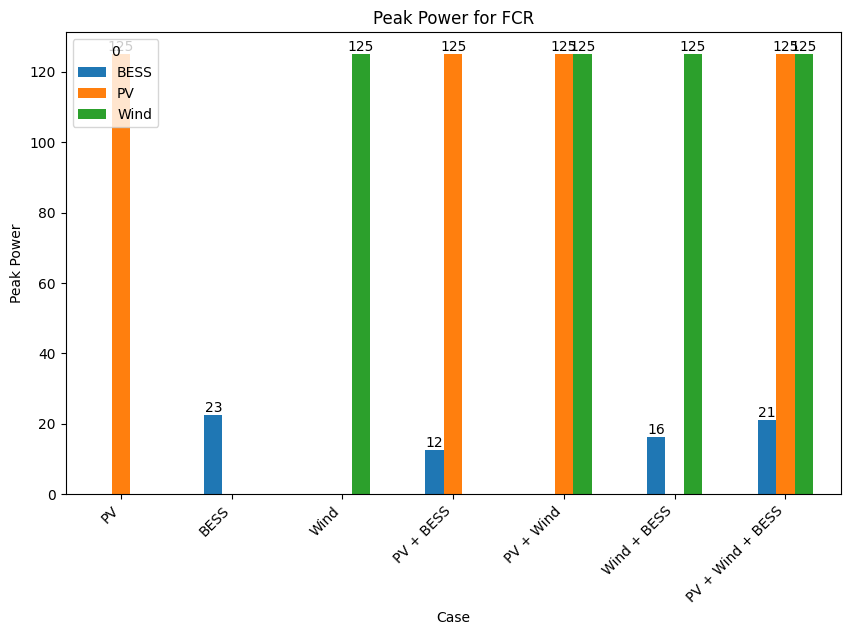

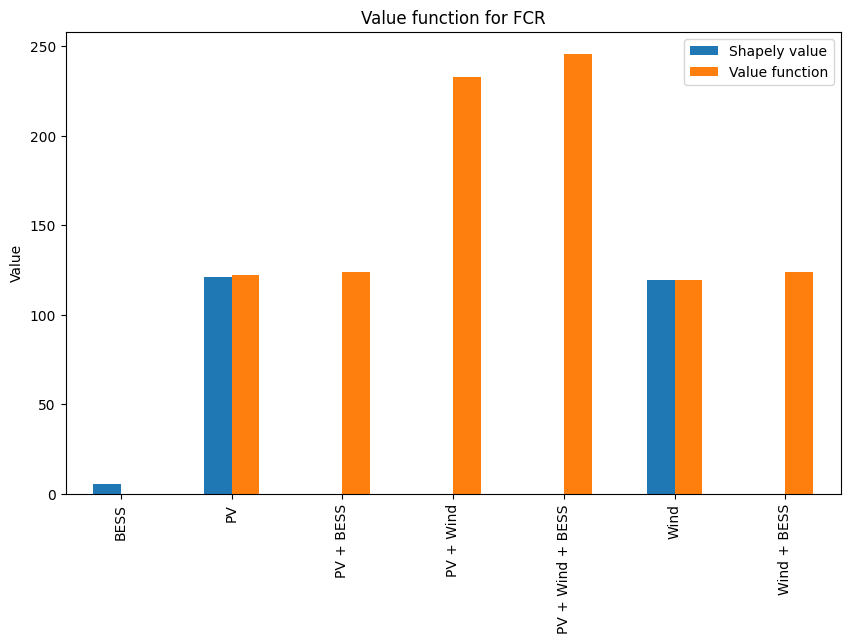

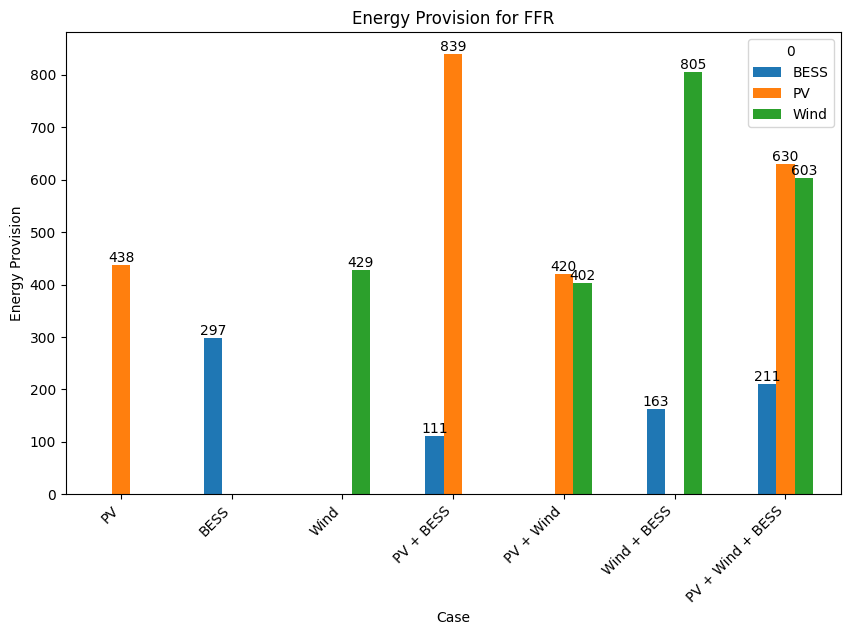

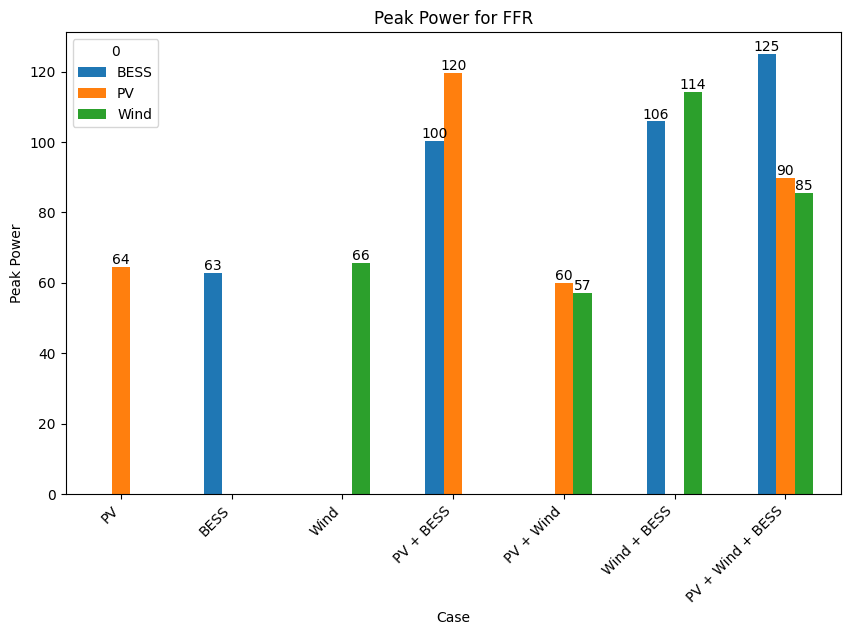

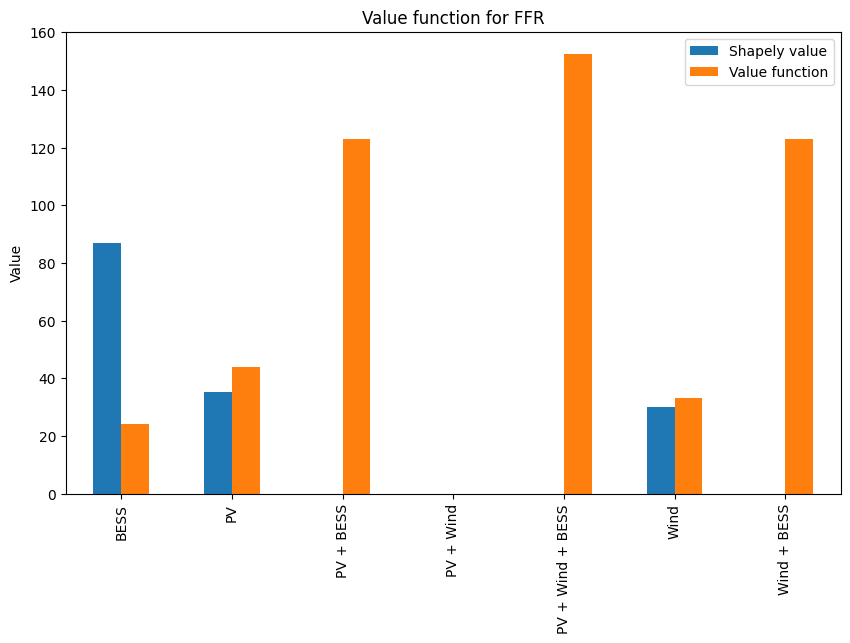

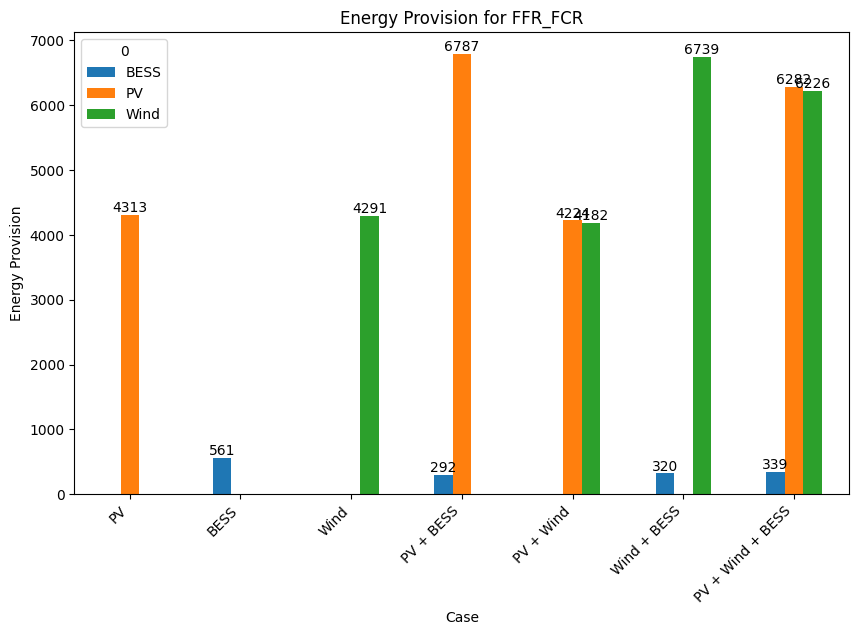

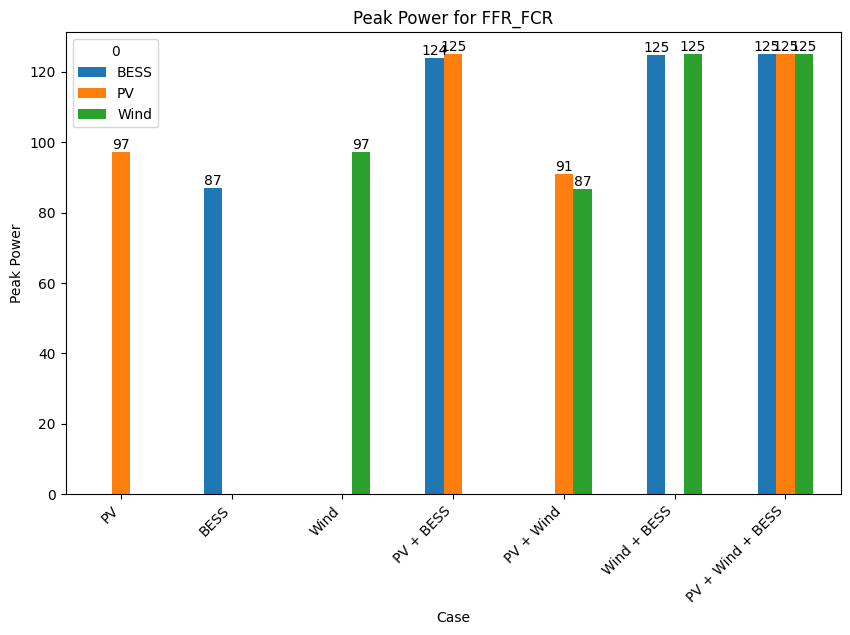

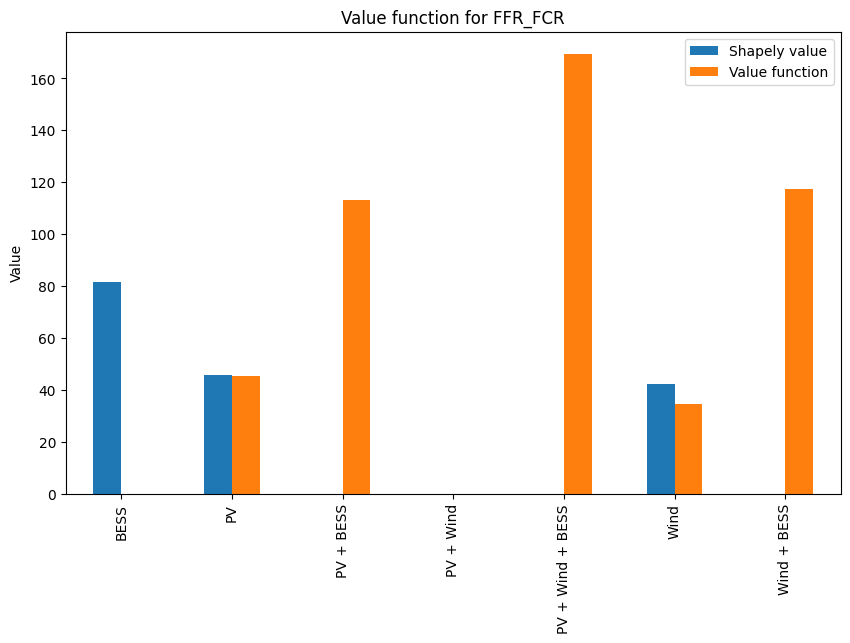

In [23]:
for service in services:
    df = pd.read_csv(f'{path}/{service}/energy_provision.csv', index_col=0)
    # modify to include only rows not containing '+'
    df = df[~df.index.str.contains('\+')]
    # move indexes into first 3 indexes with start with same first character
    df.index = df.index.str.extract('([A-Za-z]+)')[0]
    df = df.groupby(df.index).first()
    df = df.transpose()
    # df.fillna(0)
    # make grouped bar chart for each column
    ax = df.plot(kind='bar', figsize=(10, 6),
                title=f'Energy Provision for {service}', ylabel='Energy Provision', xlabel='Case')
    plt.xticks(rotation=45, ha='right')
    # show numbers above bars
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')
    plt.show()

    # do same for peak power
    df = pd.read_csv(f'{path}/{service}/peak_power.csv', index_col=0)
    # modify to include only rows not containing '+'
    df = df[~df.index.str.contains('\+')]
    # move indexes into first 3 indexes with start with same first character
    df.index = df.index.str.extract('([A-Za-z]+)')[0]
    df = df.groupby(df.index).first()
    df = df.transpose()
    # df.fillna(0)
    # make grouped bar chart for each column
    ax = df.plot(kind='bar', figsize=(10, 6),
                title=f'Peak Power for {service}', ylabel='Peak Power', xlabel='Case')
    plt.xticks(rotation=45, ha='right')
    # show numbers above bars
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')
    plt.show()

    # do same for reward and shapely values values
    df = pd.read_csv(f'{path}/{service}/value_function.csv', index_col=0)
    df = df.groupby(df.index).first()
    df = df.transpose()

    df_2 = pd.read_csv(f'{path}/{service}/shapely_value.csv', index_col=0)
    df_2 = df_2.groupby(df_2.index).first()
    df_2 = df_2.transpose()
    # merge df_2 into df where index match
    df = pd.merge(df, df_2, left_index=True, right_index=True, how='outer')
    df.columns = ['Value function', 'Shapely value']
    df.sort_index(axis=1, inplace=True)
    # change lables
    df.plot(kind='bar', figsize=(10, 6),
            title=f'Value function for {service}', ylabel='Value')

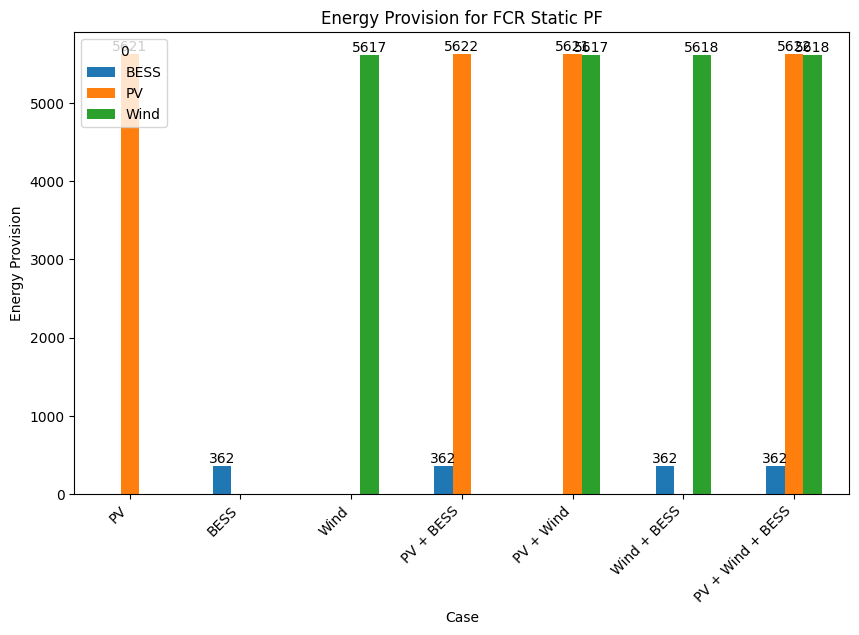

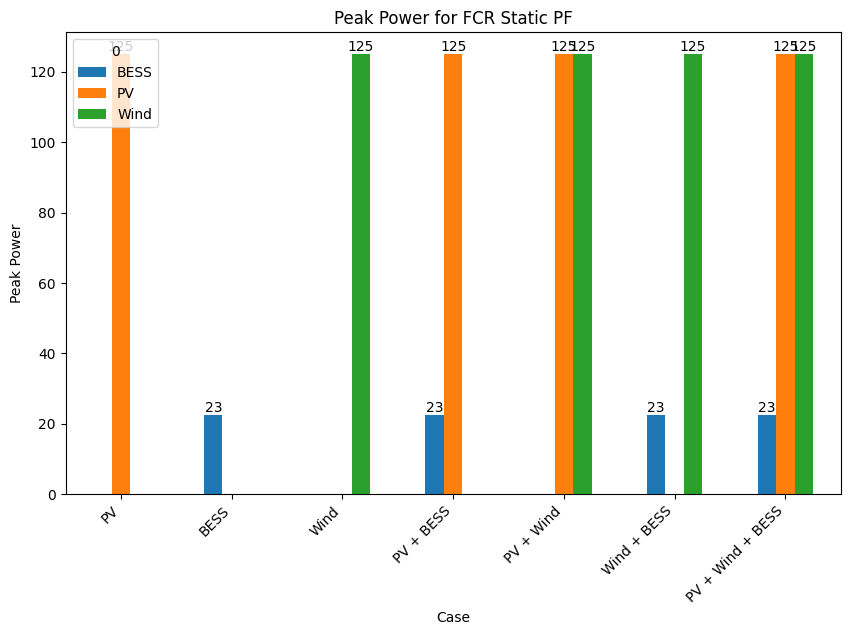

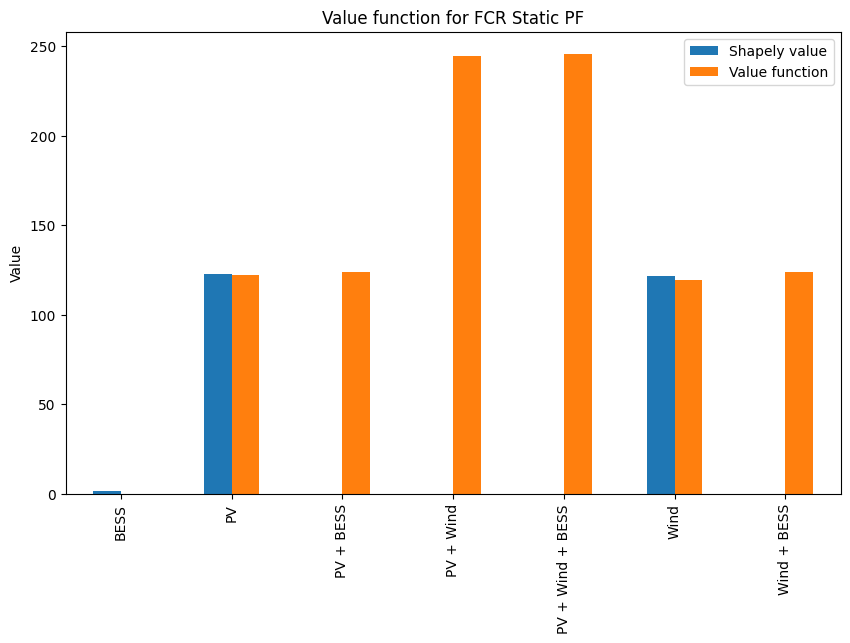

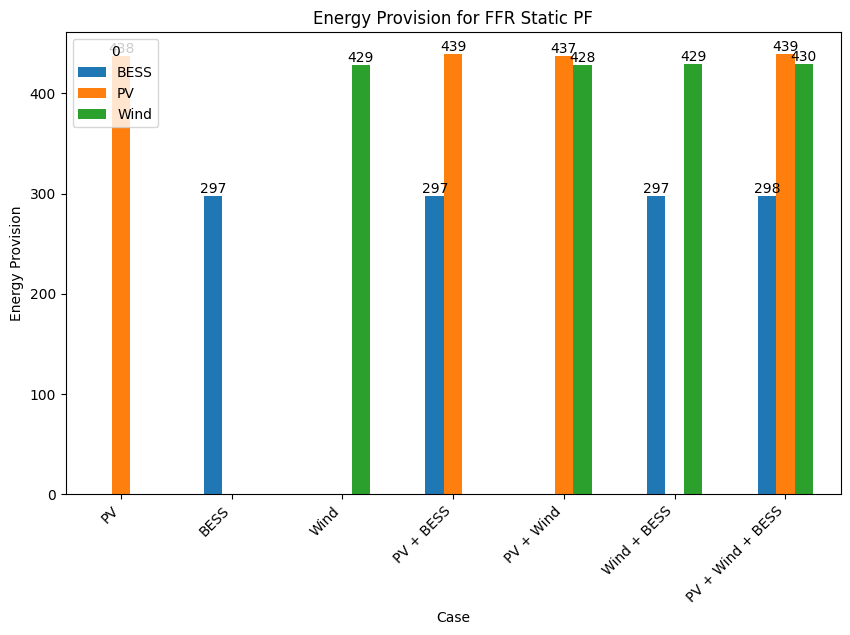

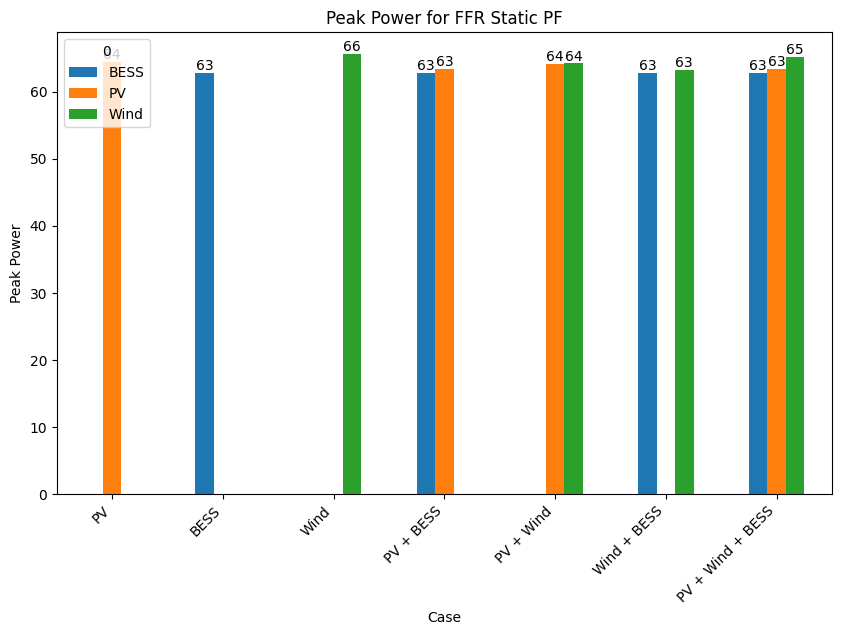

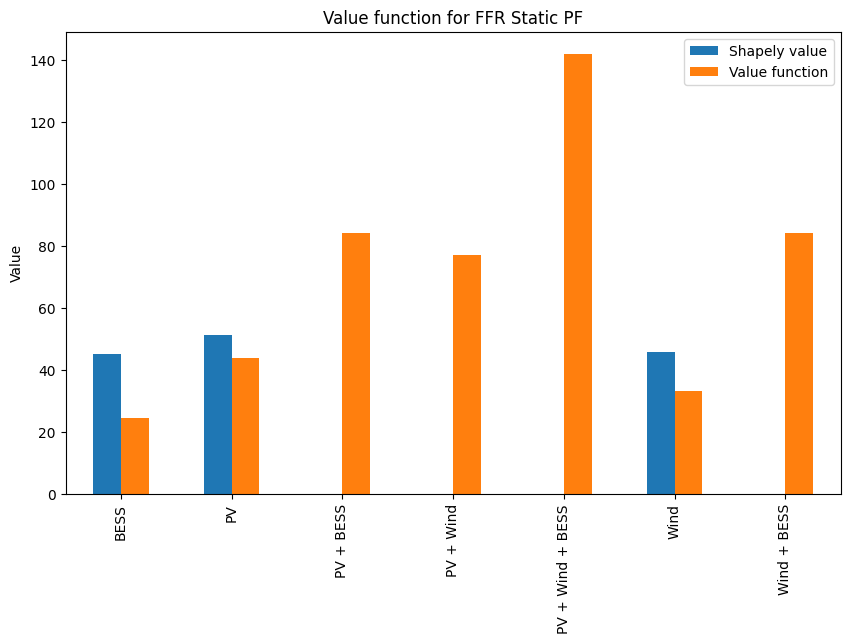

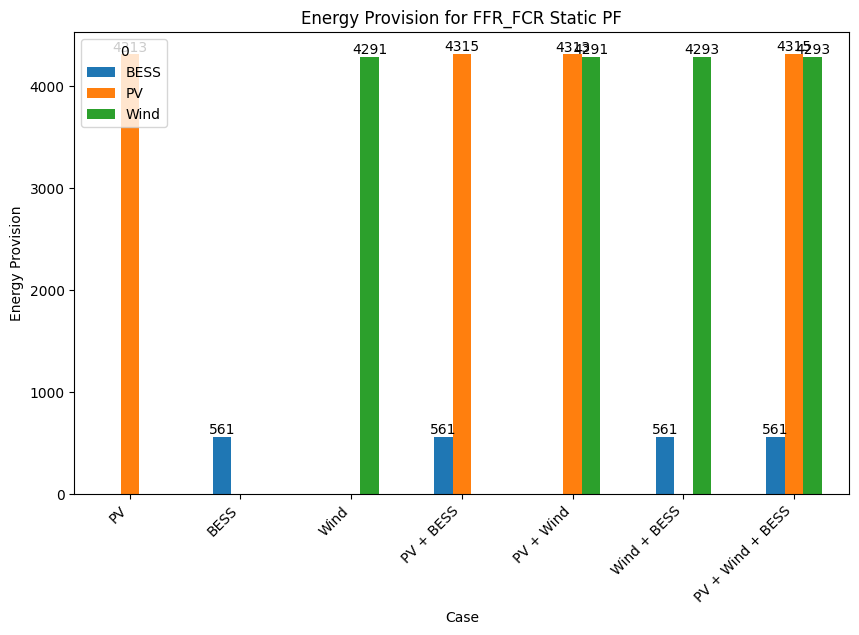

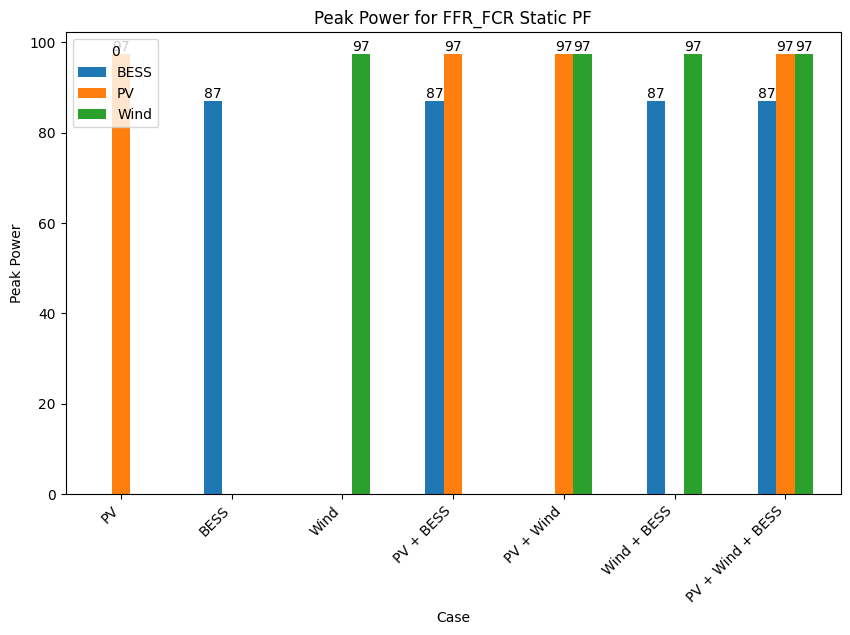

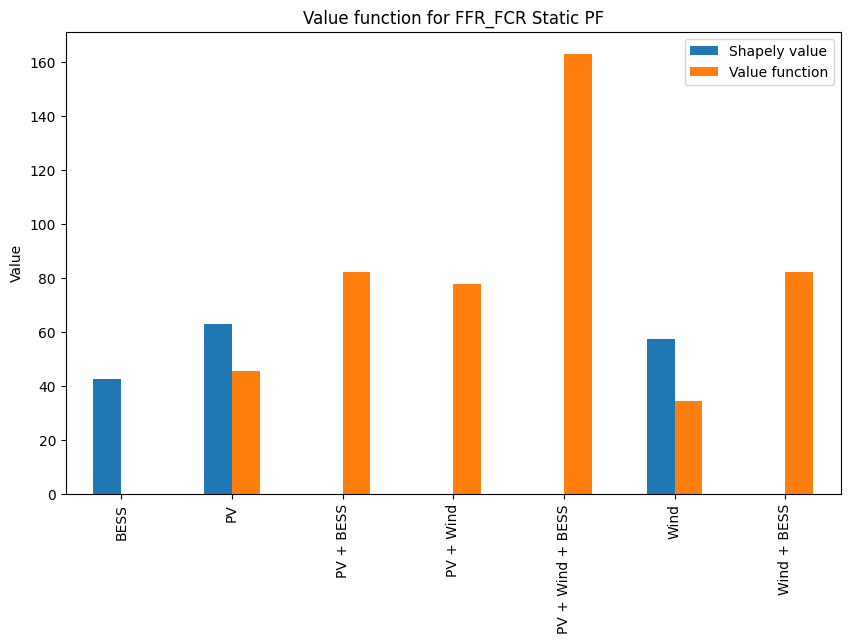

In [24]:
# do same for static pf

for service in services:
    df = pd.read_csv(f'{path}/{service}/energy_provision_static_pf.csv', index_col=0)
    # modify to include only rows not containing '+'
    df = df[~df.index.str.contains('\+')]
    # move indexes into first 3 indexes with start with same first character
    df.index = df.index.str.extract('([A-Za-z]+)')[0]
    df = df.groupby(df.index).first()
    df = df.transpose()
    # df.fillna(0)
    # make grouped bar chart for each column
    ax = df.plot(kind='bar', figsize=(10, 6),
                title=f'Energy Provision for {service} Static PF', ylabel='Energy Provision', xlabel='Case')
    plt.xticks(rotation=45, ha='right')
    # show numbers above bars
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')
    plt.show()

    # do same for peak power
    df = pd.read_csv(f'{path}/{service}/peak_power_static_pf.csv', index_col=0)
    # modify to include only rows not containing '+'
    df = df[~df.index.str.contains('\+')]
    # move indexes into first 3 indexes with start with same first character
    df.index = df.index.str.extract('([A-Za-z]+)')[0]
    df = df.groupby(df.index).first()
    df = df.transpose()
    # df.fillna(0)
    # make grouped bar chart for each column
    ax = df.plot(kind='bar', figsize=(10, 6),
                title=f'Peak Power for {service} Static PF', ylabel='Peak Power', xlabel='Case')
    plt.xticks(rotation=45, ha='right')
    # show numbers above bars
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')
    plt.show()

    # do same for reward and shapely values values
    df = pd.read_csv(f'{path}/{service}/value_function_static_pf.csv', index_col=0)
    df = df.groupby(df.index).first()
    df = df.transpose()

    df_2 = pd.read_csv(f'{path}/{service}/shapely_value_static_pf.csv', index_col=0)
    df_2 = df_2.groupby(df_2.index).first()
    df_2 = df_2.transpose()
    # merge df_2 into df where index match
    df = pd.merge(df, df_2, left_index=True, right_index=True, how='outer')
    df.columns = ['Value function', 'Shapely value']
    df.sort_index(axis=1, inplace=True)
    # change lables
    df.plot(kind='bar', figsize=(10, 6),
            title=f'Value function for {service} Static PF', ylabel='Value')

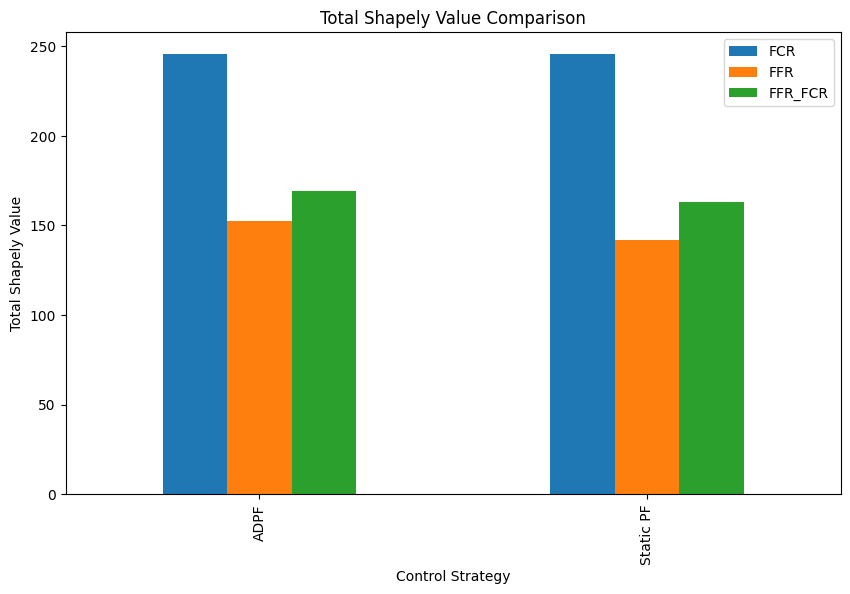

In [ ]:
# # compare  static pf and adpf total summed shapely value for all services
# df_final = pd.DataFrame(columns=services, index=['ADPF', 'Static PF'])
# for service in services:
#     df = pd.read_csv(f'{path}/{service}/shapely_value.csv', index_col=0)
#     df = df.groupby(df.index).first()
#     df = df.transpose()
#     df_2 = pd.read_csv(f'{path}/{service}/shapely_value_static_pf.csv', index_col=0)
#     df_2 = df_2.groupby(df_2.index).first()
#     df_2 = df_2.transpose()

#     df = pd.merge(df, df_2, left_index=True, right_index=True, how='outer')

#     df_final.at['ADPF', service] = df.sum(axis=0).iloc[0]
#     df_final.at['Static PF', service] = df.sum(axis=0).iloc[1]

# # plot df_final as grouped bar chart
# ax = df_final.plot(kind='bar', figsize=(10, 6),
#                    title='Total Shapely Value Comparison', ylabel='Total Shapely Value', xlabel='Control Strategy')


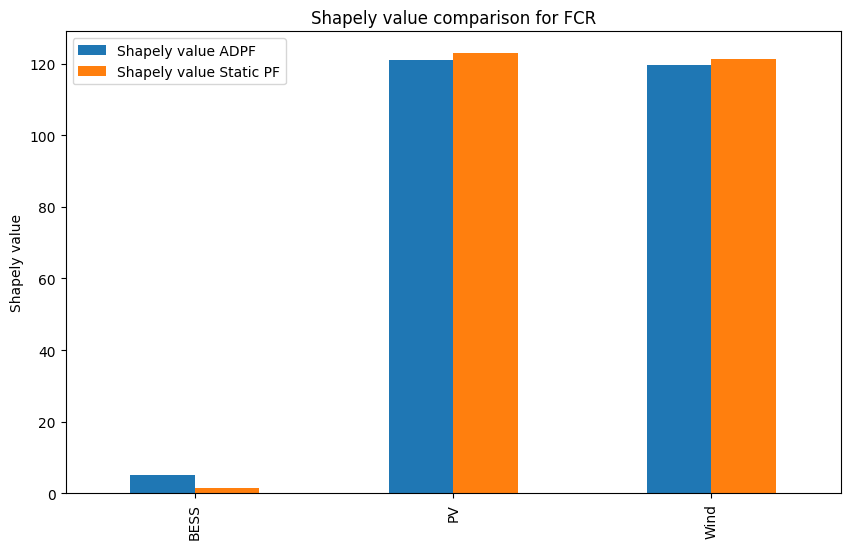

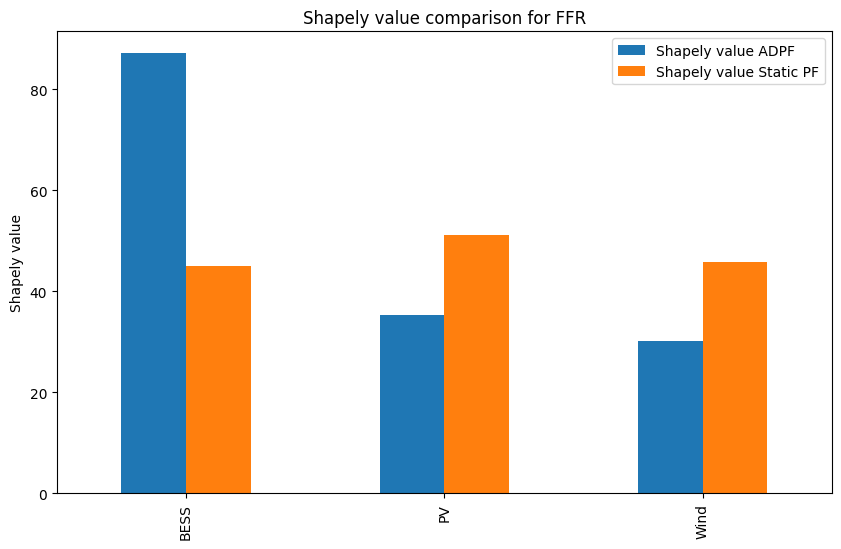

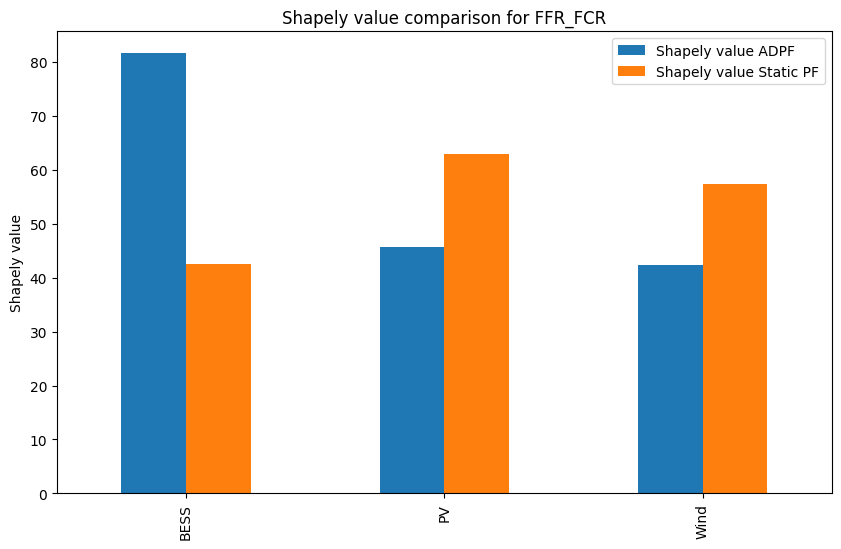

In [26]:
# compare adpf and static pf for shapely values
for service in services:
    df = pd.read_csv(f'{path}/{service}/shapely_value.csv', index_col=0)
    df = df.groupby(df.index).first()
    df = df.transpose()
    df_2 = pd.read_csv(f'{path}/{service}/shapely_value_static_pf.csv', index_col=0)
    df_2 = df_2.groupby(df_2.index).first()
    df_2 = df_2.transpose()

    df = pd.merge(df, df_2, left_index=True, right_index=True, how='outer')
    df.columns = ['Shapely value ADPF', 'Shapely value Static PF']
    df.sort_index(axis=1, inplace=True)
    # change lables
    df.plot(kind='bar', figsize=(10, 6),
            title=f'Shapely value comparison for {service}', ylabel='Shapely value')

In [27]:
import math as mt
import itertools

In [28]:
VS = {'PV': 0, 'Wind': 0, 'BESS': 0, 'SC': 0, 'PV + Wind': 0, 'PV + BESS': 1, 'PV + SC': 1, 'Wind + BESS': 1, 'Wind + SC': 0, 'BESS + SC': 0, 'PV + Wind + BESS': 1, 'PV + Wind + SC': 1.2, 'PV + BESS + SC': 1.2, 'Wind + BESS + SC': 1.2, 'PV + Wind + BESS + SC': 1.6}
VS[()] = 0  # empty coalition

In [29]:
# convert strings to tuples removing spaces and split by +
VS = {tuple(k.replace(' ', '').split('+')): v for k, v in VS.items() if type(k) is str}
VS

{('PV',): 0,
 ('Wind',): 0,
 ('BESS',): 0,
 ('SC',): 0,
 ('PV', 'Wind'): 0,
 ('PV', 'BESS'): 1,
 ('PV', 'SC'): 1,
 ('Wind', 'BESS'): 1,
 ('Wind', 'SC'): 0,
 ('BESS', 'SC'): 0,
 ('PV', 'Wind', 'BESS'): 1,
 ('PV', 'Wind', 'SC'): 1.2,
 ('PV', 'BESS', 'SC'): 1.2,
 ('Wind', 'BESS', 'SC'): 1.2,
 ('PV', 'Wind', 'BESS', 'SC'): 1.6}

In [30]:
VS[()] = 0  # ensure empty coalition is present 

In [31]:
VS

{('PV',): 0,
 ('Wind',): 0,
 ('BESS',): 0,
 ('SC',): 0,
 ('PV', 'Wind'): 0,
 ('PV', 'BESS'): 1,
 ('PV', 'SC'): 1,
 ('Wind', 'BESS'): 1,
 ('Wind', 'SC'): 0,
 ('BESS', 'SC'): 0,
 ('PV', 'Wind', 'BESS'): 1,
 ('PV', 'Wind', 'SC'): 1.2,
 ('PV', 'BESS', 'SC'): 1.2,
 ('Wind', 'BESS', 'SC'): 1.2,
 ('PV', 'Wind', 'BESS', 'SC'): 1.6,
 (): 0}

In [32]:
my_names = ['PV', 'Wind', 'BESS', 'SC']

# Game Theory

## Convexity

In [56]:
import pandas as pd
from src.game_theory_helpers import powerset, is_convex_game, check_convexity_grand_coalition, get_loo, get_shapley_value, get_nash_bargaining_solution

In [62]:
players = ['A', 'B', 'C']
v = {
    (): 0,
    ('A',): 0,
    ('B',): 0,
    ('C',): 0,
    ('A', 'B'): 100,
    ('A', 'C'): 0,
    ('B', 'C'): 0,
    ('A', 'B', 'C'): 200
}
# convert v to frozenset
v_frozen = {frozenset(k): val for k, val in v.items()}

In [68]:
def get_banzhaf_value(v: dict, players: list, normalized=True) -> dict:
    """
    get Banzhaf values for each player

    v: Characteristic function of the game, must be defined for EVERY coalition
        {frozenset -> float}
    players: list of players
    """
    factor = 1 / (2 ** (len(players) - 1))
    banzhaf_values = {p: 0 for p in players}
    for S in powerset(players):
        if S:  # skip 
            for p in S:
                subset_wo_p = frozenset(c for c in S if c != p)
                marginal_contribution = v.get(S) - v.get(subset_wo_p)
                banzhaf_values[p] += marginal_contribution
    banzhaf_values = {k: v * factor for k, v in banzhaf_values.items()}
    if normalized:
        total_banzhaf = sum(banzhaf_values.values())
        reward = v[frozenset(players)]
        if total_banzhaf > 0:
            banzhaf_values = {k: v * (reward / total_banzhaf) for k, v in banzhaf_values.items()}
    return banzhaf_values

In [69]:
v_frozen

{frozenset(): 0,
 frozenset({'A'}): 0,
 frozenset({'B'}): 0,
 frozenset({'C'}): 0,
 frozenset({'A', 'B'}): 100,
 frozenset({'A', 'C'}): 0,
 frozenset({'B', 'C'}): 0,
 frozenset({'A', 'B', 'C'}): 200}

In [70]:
get_banzhaf_value(v_frozen, players)

{'A': 85.71428571428571, 'B': 85.71428571428571, 'C': 28.57142857142857}

In [8]:
# test
is_convex_game(v_frozen, players)
check_convexity_grand_coalition(v_frozen, players)
print(get_loo(v_frozen, players))
print(get_shapley_value(v_frozen, players))
print(get_nash_bargaining_solution(v_frozen, players))

    Grand-Coalition Convexity holds
        Max benefit: 200.00, Min benefit: 100.00
{'A': 80.0, 'B': 80.0, 'C': 40.0}
{'A': 83.33333333333334, 'B': 83.33333333333334, 'C': 33.333333333333336}
{'A': 66.666666738125, 'B': 66.66666673812502, 'C': 66.66666652375004}


In [9]:
def print_2f_dict(d: dict):
    final_print = ''
    for k, v in d.items():
        final_print += f"{k}: {v:.2f}, "
    return final_print

## Define Plot Function

In [27]:
def add_shapely_nbs(df: pd.DataFrame, players: list,
                    add_LOO=False) -> pd.DataFrame:
    """
    Add shapely and nbs values to dataframe df, and optionally LOO

    df: Dataframe with values for each coalition
    players: list of players
    """
    new_index = pd.MultiIndex.from_product((df.index, ['value', 'shapley', 'nbs']))
    if add_LOO:
        new_index = pd.MultiIndex.from_product((df.index, ['value', 'shapley', 'nbs', 'loo']))
    df_new = pd.DataFrame(index=new_index, columns=df.columns)
    for idx, row in df.iterrows():
        df_new.loc[(idx, 'value')] = row
        v = {frozenset(k): val for k, val in row.items()}
        shapley, nbs = get_shapley_value(v, players), get_nash_bargaining_solution(v, players)
        df_new.loc[(idx, 'shapley'), list((k,) for k in shapley.keys())] = list(shapley.values())
        df_new.loc[(idx, 'nbs'), list((k,) for k in nbs.keys())] = list(nbs.values())
        if add_LOO:
            loo = get_loo(v, players)
            df_new.loc[(idx, 'loo'), list((k,) for k in loo.keys())] = list(loo.values())
    return df_new

In [88]:
def visualzie_value_results(df_new, df_newstat):
    # plot for each service value, shapely and nbs
    for service in df_new.index.get_level_values(0).unique():
        df_plot = df_new.loc[service]
        df_plot = df_plot.astype(float)
        df_plot = df_plot.transpose()
        df_plot.columns = [col + ' Dynamic PF' for col in df_plot.columns]
        # also add df_newstat values
        if df_newstat is not None:
            df_plot_stat = df_newstat.loc[service]
            df_plot_stat = df_plot_stat.astype(float)
            df_plot_stat = df_plot_stat.transpose()
            df_plot_stat.columns = [col + ' Static PF' for col in df_plot_stat.columns]
            # combine
            df_plot_total = pd.concat([df_plot, df_plot_stat], axis=1)
        else:
            df_plot_total = df_plot
        # 1st plot: only the players
        df_plot = df_plot_total.iloc[:len(players)]
        ax = df_plot.plot(kind='bar', figsize=(10, 6),
                        title=f'Service: {service} - Individual Value, Shapley and NBS', ylabel='Value in €')
        plt.grid()
        plt.ylim(df_plot.min().min(), df_plot.max().max()+1)
        plt.xticks(rotation=0)
        # show numbers above bars
        for p in ax.patches:
            if p.get_height() >= 0:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, .2 + p.get_height()),
                            ha='center', va='bottom', rotation=90, fontsize=10)
        plt.xticks(rotation=45, ha='right')
        plt.ylim(0, df_plot.max().max()+3)
        plt.show()

        # 2nd plot: all coalitions
        plt.figure()
        df_plot = df_plot_total.iloc[len(players):]
        ax = df_plot.plot(kind='bar', figsize=(10, 6),
                        title=f'Service: {service} - Value of Coalitions', ylabel='Value in €')
        plt.grid()
        plt.ylim(df_plot.min().min(), df_plot.max().max()+1)
        plt.xticks(rotation=0)
        # show numbers above bars
        for p in ax.patches:
            if p.get_height() > 0:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, .2 + p.get_height()),
                            ha='center', va='bottom', rotation=90, fontsize=10)
        plt.xticks(rotation=45, ha='right')
        plt.ylim(0, df_plot.max().max()+3)
        plt.show()


## DVPP1

no stochastic production, just 1MW of PV, Wind, BESS each
IO_dict =      {'PV': (get_pv_sys(), 'lpf', 1),
                'Wind': (get_wind_sys(), 'lpf', 1),
                'BESS': (get_bess_io_sys(t_drop=8), 'hpf', 1),
                }

In [ ]:
# load data
# df = pd.read_csv('pics/new/values.csv', index_col=0, header=[0,1,2])
df = pd.read_csv('pics/v1/values_dyn.csv', index_col=0, header=[0,1,2])
df.columns = [tuple(c for c in col if c!='nan') for col in df.columns.values]

df[df < 0] = 0  # set values below zero to zero
df

,"(PV,)","(Wind,)","(BESS,)","(PV, Wind)","(PV, BESS)","(Wind, BESS)","(PV, Wind, BESS)",()
FCR,12.3703,12.1389,0.0000,23.3519,12.1389,11.9074,23.8148,0
FFR,1.1316,0.8988,1.5971,1.9140,3.0520,3.0520,5.0565,0
FFR-FCR,4.7321,3.8063,0.0000,7.6125,11.6759,11.9074,20.1114,0
FCR-D,12.6018,12.6018,0.0000,25.2036,12.6018,12.6018,25.2036,0


In [46]:
# also load static pf values
dfstat = pd.read_csv('pics/v1/values_stat.csv', index_col=0, header=[0,1,2])
dfstat.columns = [tuple(c for c in col if c!='nan') for col in dfstat.columns.values]
players_stat = list(dfstat.columns[-2])
dfstat[dfstat < 0] = 0  # set values below zero to zero
dfstat

,"(PV,)","(Wind,)","(BESS,)","(PV, Wind)","(PV, BESS)","(Wind, BESS)","(PV, Wind, BESS)",()
FCR,12.3703,12.1389,0.0000,24.2777,6.3523,6.3523,16.8710,0
FFR,1.1316,0.8988,1.5971,2.0303,2.7610,2.4700,4.1254,0
FFR-FCR,4.7321,3.8063,0.0000,8.5383,6.3523,6.3523,16.8710,0
FCR-D,12.6018,12.6018,0.0000,25.2036,7.2782,7.2782,19.6485,0


In [47]:
df_new = add_shapely_nbs(df, players, add_LOO=True)
df_newstat = add_shapely_nbs(dfstat, players, add_LOO=True)

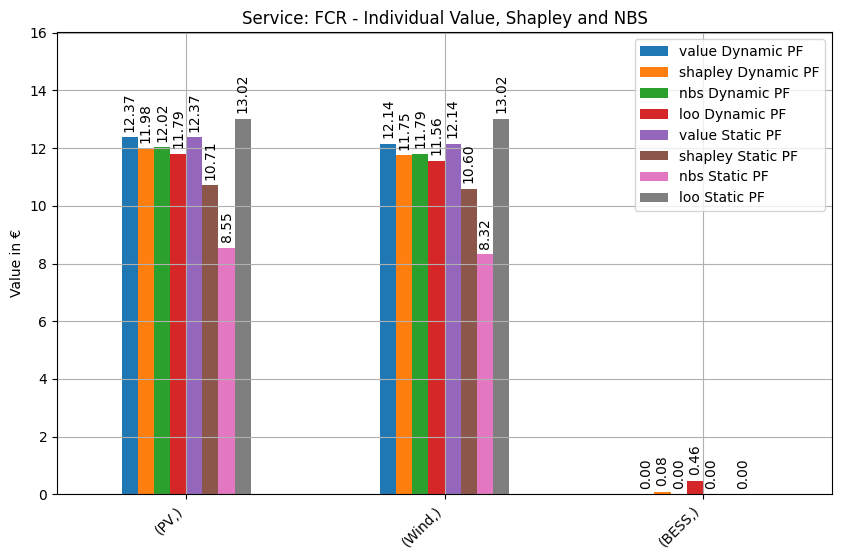

<Figure size 640x480 with 0 Axes>

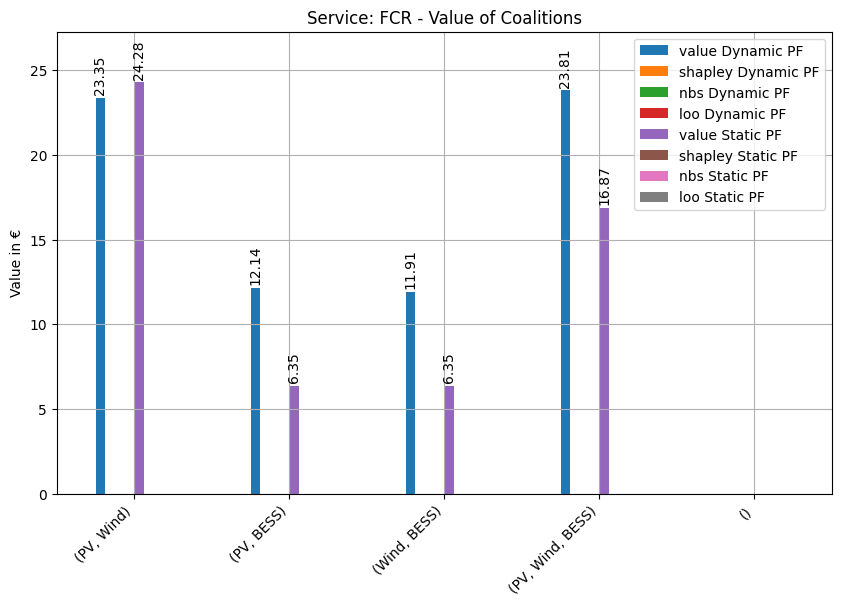

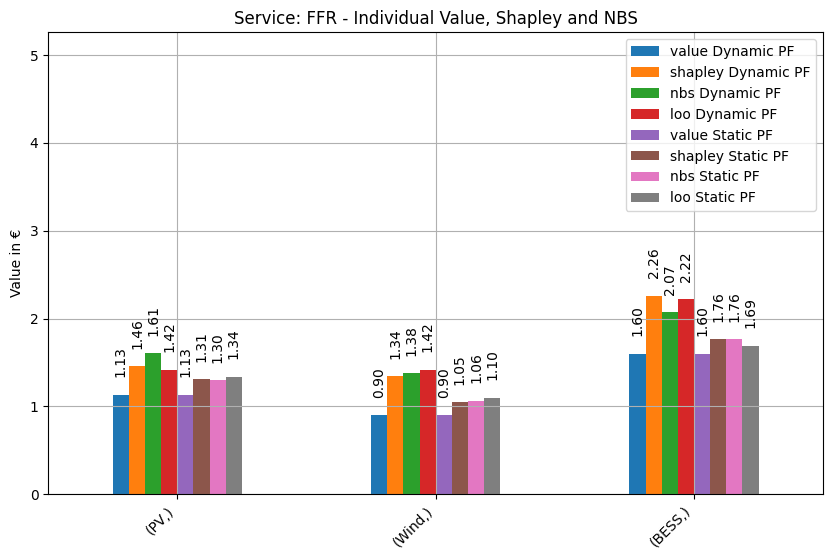

<Figure size 640x480 with 0 Axes>

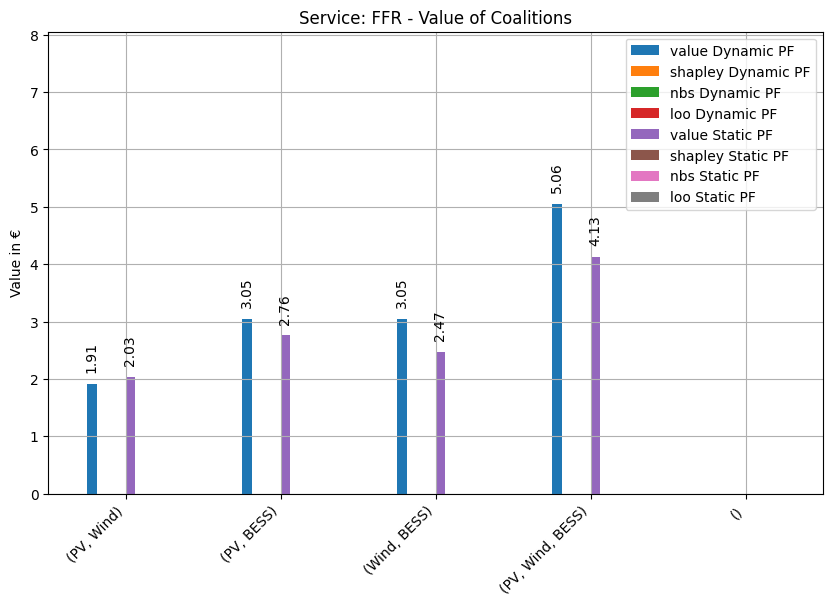

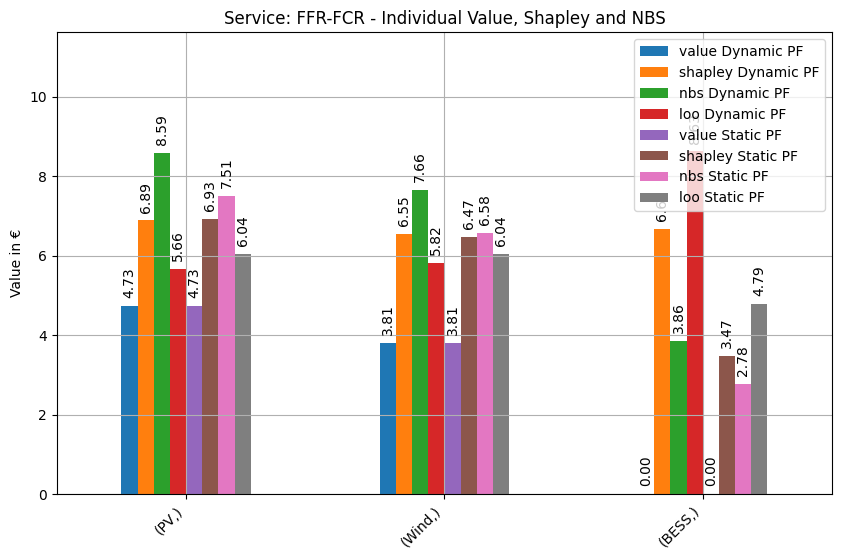

<Figure size 640x480 with 0 Axes>

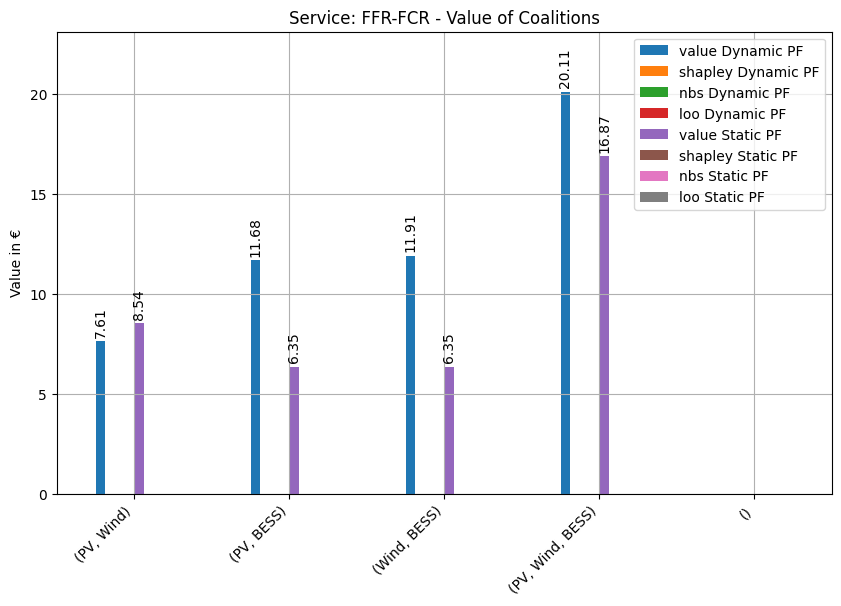

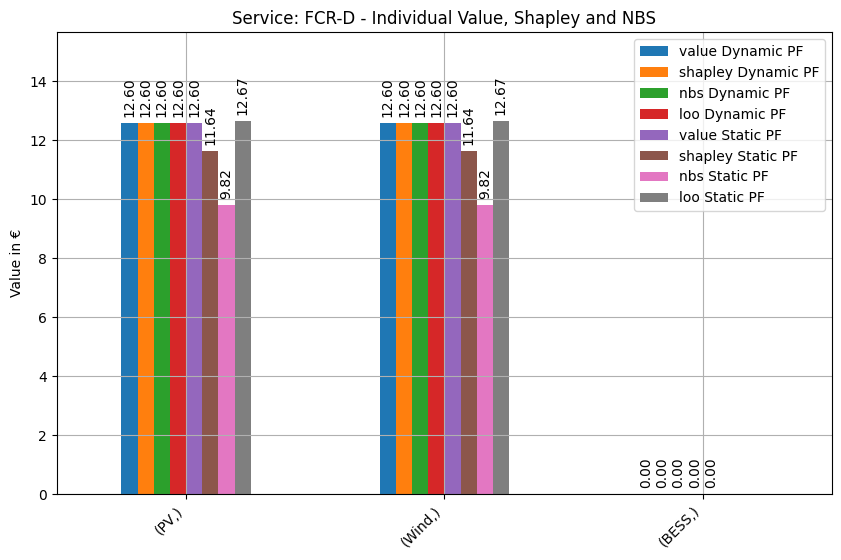

<Figure size 640x480 with 0 Axes>

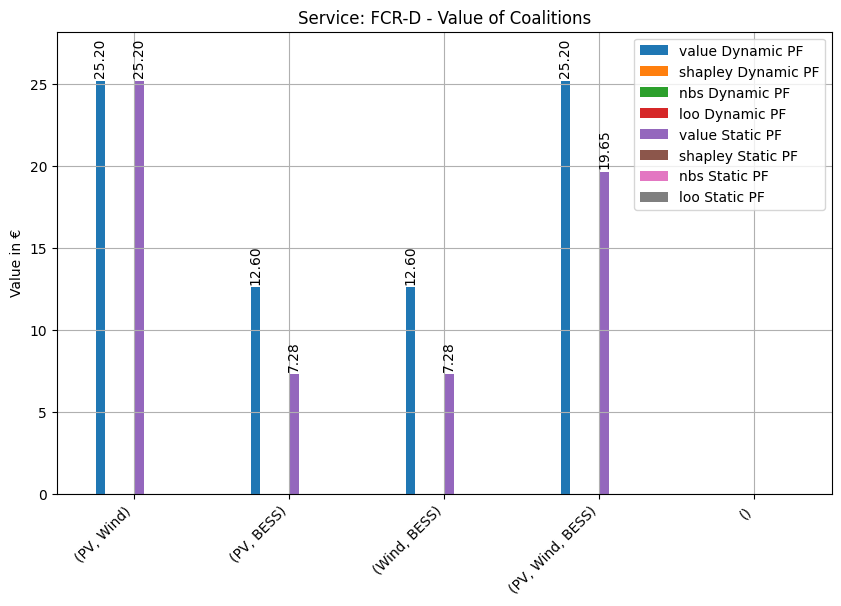

In [48]:
visualzie_value_results(df_new, df_newstat)

In [20]:
# compute shapelt value for every row
for idx, row in df.iterrows():
    v = {frozenset(k): val for k, val in row.items()}
    v[frozenset()] = 0  # ensure empty coalition is present
    print(f"{idx} LOO: {print_2f_dict(get_loo(v, players))}")
    print(f"{idx} Shapely values: {print_2f_dict(get_shapley_value(v, players))}")
    print(f"{idx} NBS: {print_2f_dict(get_nash_bargaining_solution(v, players))}")
    is_convex_game(v, players)
    check_convexity_grand_coalition(v, players)

    # compare to static
    v_stat = {frozenset(k): val for k, val in dfstat.loc[idx].items()}
    v_stat[frozenset()] = 0  # ensure empty coalition is present
    print(f"{idx} Static PF Shapely values: {print_2f_dict(get_shapley_value(v_stat, players_stat))}")
    print(f"{idx} Static PF NBS: {print_2f_dict(get_nash_bargaining_solution(v_stat, players_stat))}")
    is_convex_game(v_stat, players_stat)
    check_convexity_grand_coalition(v_stat, players_stat)
    print('---')


FCR LOO: PV: 11.79, Wind: 11.56, BESS: 0.46, 
FCR Shapely values: PV: 11.98, Wind: 11.75, BESS: 0.08, 
FCR NBS: PV: 12.02, Wind: 11.79, BESS: 0.00, 
Game is not convex: frozenset({'PV'}), frozenset({'Wind'})
    Game is not Grand-Coalition convex: frozenset({'PV'}), frozenset({'Wind', 'BESS'}), diff=-0.46
FCR Static PF Shapely values: PV: 10.71, Wind: 10.60, BESS: -4.44, 
FCR Static PF NBS: PV: 8.55, Wind: 8.32, BESS: 0.00, 
Game is not convex: frozenset({'PV'}), frozenset({'Wind'})
    Game is not Grand-Coalition convex: frozenset({'PV'}), frozenset({'Wind', 'BESS'}), diff=-1.85
---
FFR LOO: PV: 1.42, Wind: 1.42, BESS: 2.22, 
FFR Shapely values: PV: 1.46, Wind: 1.34, BESS: 2.26, 
FFR NBS: PV: 1.61, Wind: 1.38, BESS: 2.07, 
Game is not convex: frozenset({'PV'}), frozenset({'Wind'})
    Grand-Coalition Convexity holds
        Max benefit: 1.55, Min benefit: 0.87
FFR Static PF Shapely values: PV: 1.31, Wind: 1.05, BESS: 1.76, 
FFR Static PF NBS: PV: 1.30, Wind: 1.06, BESS: 1.76, 
    Gra

## DVPP2

stochastic production of PV, BESS Wind with 
IO_dict =      {'PV': (get_pv_sys(), 'lpf', 2),
                'Wind': (get_wind_sys(), 'lpf', 1.5),
                'BESS': (get_bess_io_sys(t_drop=8), 'hpf', 1),
                }

In [ ]:
# load data
# df = pd.read_csv('pics/new/values.csv', index_col=0, header=[0,1,2])
df = pd.read_csv('pics/v2/values_dyn.csv', index_col=0, header=[0,1,2])
df.columns = [tuple(c for c in col if c!='nan') for col in df.columns.values]

df[df < 0] = 0  # set values below zero to zero
# combine 1st col and index to MultiIndex
df.index = pd.MultiIndex.from_arrays([df.index, df.iloc[:, 0]], names=['Service', 'Scenario'])
df.drop(df.columns[0], axis=1, inplace=True)  # drop first column
players = list(str(x[0]) for x in df.columns[:3])
df.head()

(PV,)   (Wind,)  (BESS,)  (PV, Wind)  (PV, BESS)  \
Service Scenario                                                        
FCR     0         10.27292   5.98447      0.0    15.38167    10.08070   
        1          0.00000   2.75329      0.0     2.69080     0.00000   
        2         10.42807   8.02740      0.0    17.56398    10.23295   
        3         11.33932   7.30694      0.0    17.73109    11.12715   
        4         26.78677  16.34064      0.0    41.00062    26.28556   

                  (Wind, BESS)  (PV, Wind, BESS)  
Service Scenario                                  
FCR     0              5.98447          15.68659  
        1              2.70079           2.74414  
        2              7.87433          17.91217  
        3              7.16761          18.08259  
        4             16.02906          41.81341

In [50]:
# also load static pf values
dfstat = pd.read_csv('pics/v2/values_stat.csv', index_col=0, header=[0,1,2])
dfstat.columns = [tuple(c for c in col if c!='nan') for col in dfstat.columns.values]
players = list(dfstat.columns[-2])
dfstat[dfstat < 0] = 0  # set values below zero to zero
# combine 1st col and index to MultiIndex
dfstat.index = pd.MultiIndex.from_arrays([dfstat.index, df.iloc[:, 0]], names=['Service', 'Scenario'])
dfstat.drop(dfstat.columns[0], axis=1, inplace=True)  # drop first column
players = list(str(x[0]) for x in dfstat.columns[:3])
dfstst_mean = dfstat.groupby(level=0).mean()

In [51]:
# mean over all scenarios
df_mean = df.groupby('Service').mean()
# check for convexity, shapely and nbs for mean values
for idx, row in df_mean.iterrows():
    v = {frozenset(k): val for k, val in row.items()}
    v[frozenset()] = 0  # ensure empty coalition is present
    print(f"{idx} Shapely values: {print_2f_dict(get_shapley_value(v, players))}")
    print(f"{idx} NBS: {print_2f_dict(get_nash_bargaining_solution(v, players))}")
    is_convex_game(v, players)
    check_convexity_grand_coalition(v, players)

FCR Shapely values: PV: 9.33, Wind: 6.81, BESS: 0.06, 
FCR NBS: PV: 9.38, Wind: 6.82, BESS: 0.00, 
Game is not convex: frozenset({'PV'}), frozenset({'Wind'})
    Game is not Grand-Coalition convex: frozenset({'PV'}), frozenset({'Wind', 'BESS'}), diff=-0.36
FCR-D Shapely values: PV: 9.81, Wind: 7.34, BESS: 0.00, 
FCR-D NBS: PV: 9.81, Wind: 7.34, BESS: 0.00, 
    Grand-Coalition Convexity holds
        Max benefit: 0.00, Min benefit: -0.02
FFR Shapely values: PV: 4.10, Wind: 3.13, BESS: 5.85, 
FFR NBS: PV: 4.48, Wind: 3.54, BESS: 5.04, 
Game is not convex: frozenset({'PV'}), frozenset({'Wind'})
    Grand-Coalition Convexity holds
        Max benefit: 3.72, Min benefit: 1.28
FFR-FCR Shapely values: PV: 4.94, Wind: 3.18, BESS: 3.86, 
FFR-FCR NBS: PV: 5.72, Wind: 4.23, BESS: 2.03, 
Game is not convex: frozenset({'PV'}), frozenset({'Wind'})
    Grand-Coalition Convexity holds
        Max benefit: 6.57, Min benefit: 0.81


In [52]:
df_new = add_shapely_nbs(df_mean, players)
df_newstat = add_shapely_nbs(dfstst_mean, players)

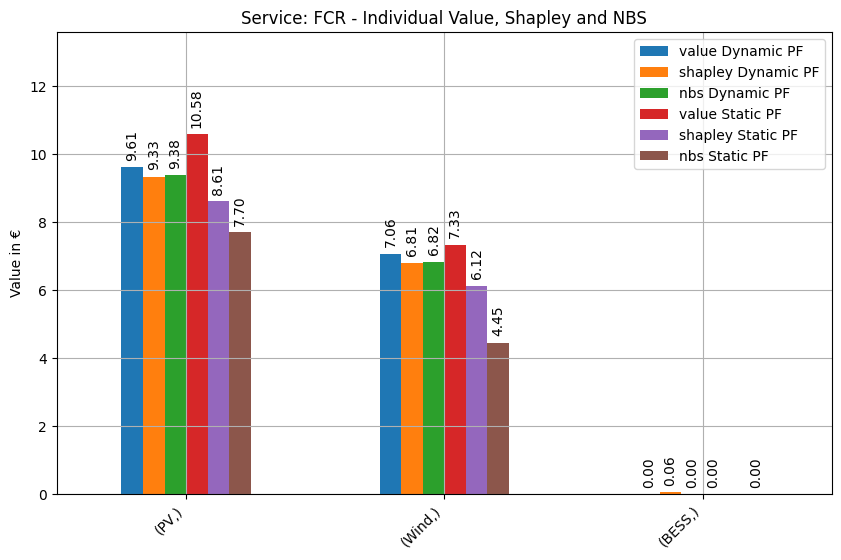

<Figure size 640x480 with 0 Axes>

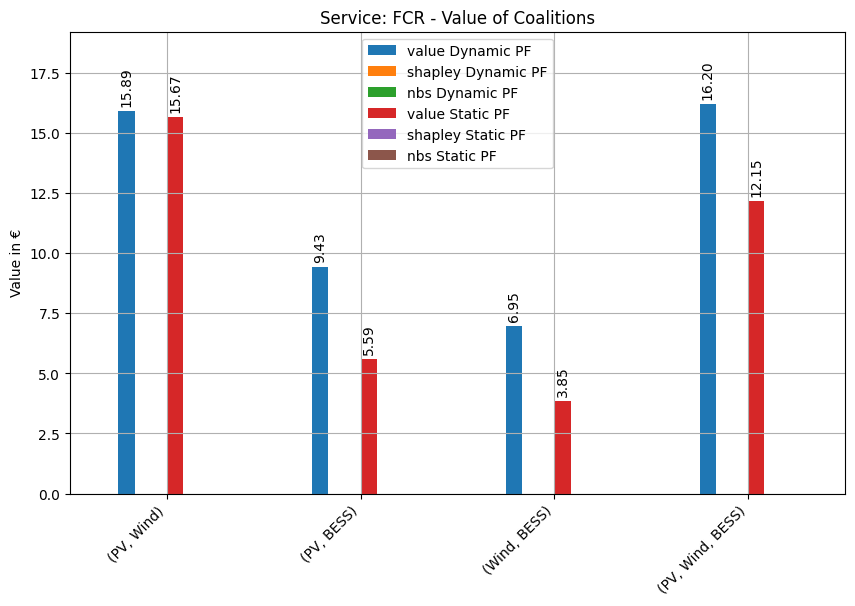

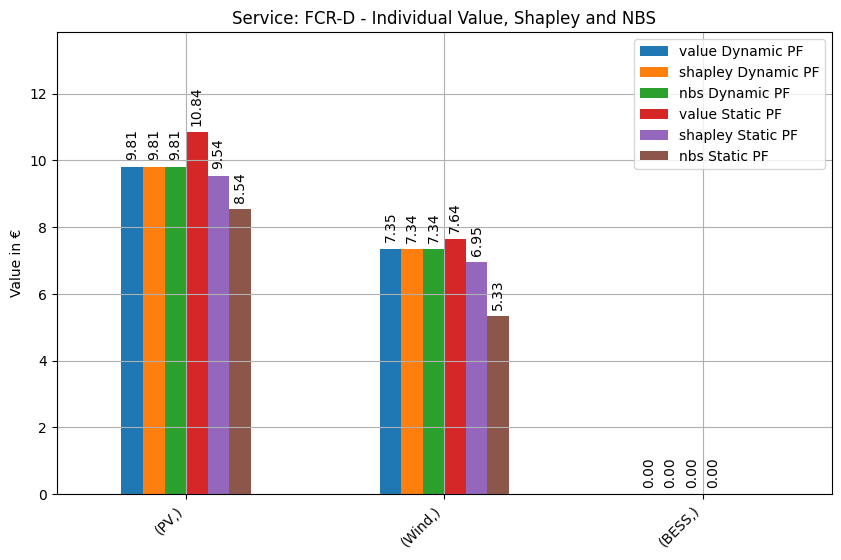

<Figure size 640x480 with 0 Axes>

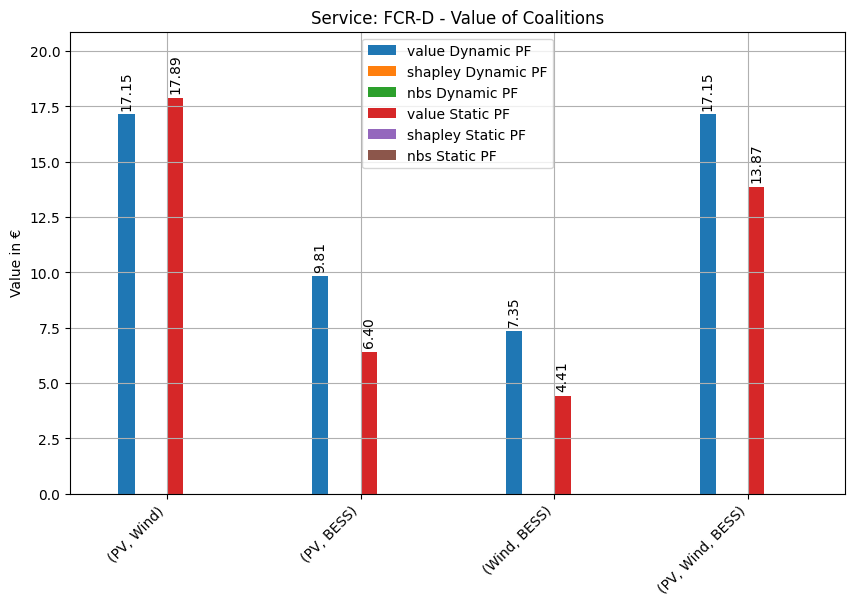

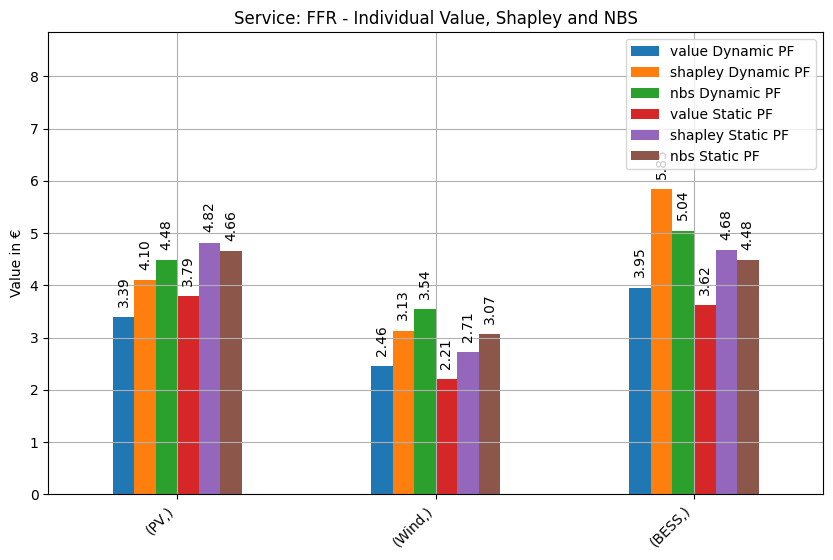

<Figure size 640x480 with 0 Axes>

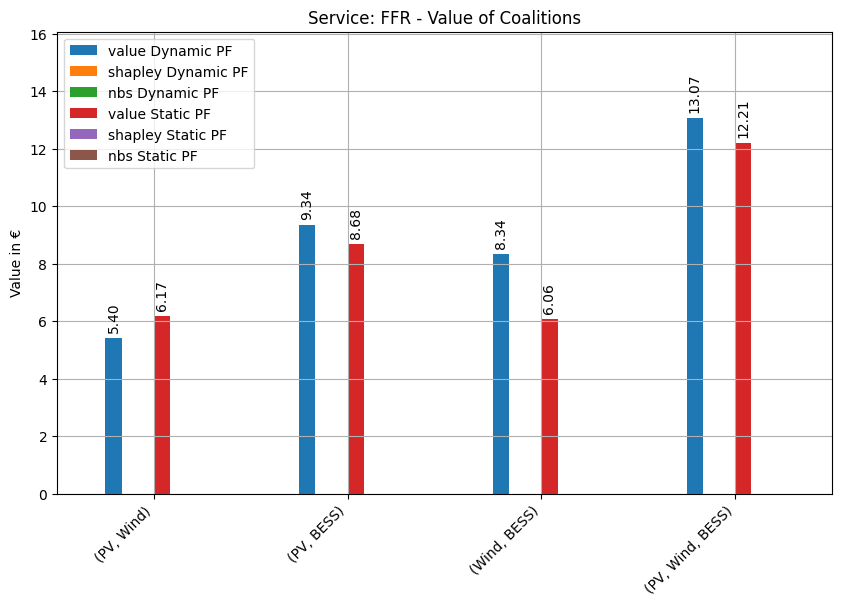

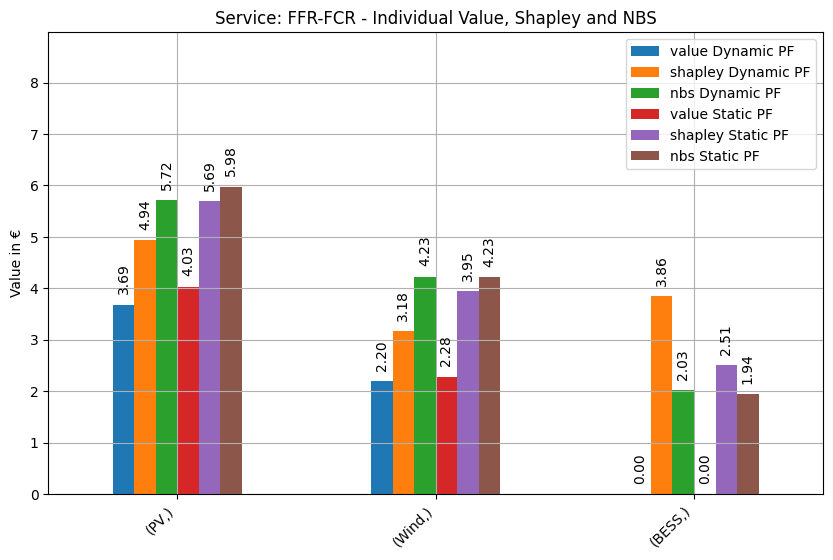

<Figure size 640x480 with 0 Axes>

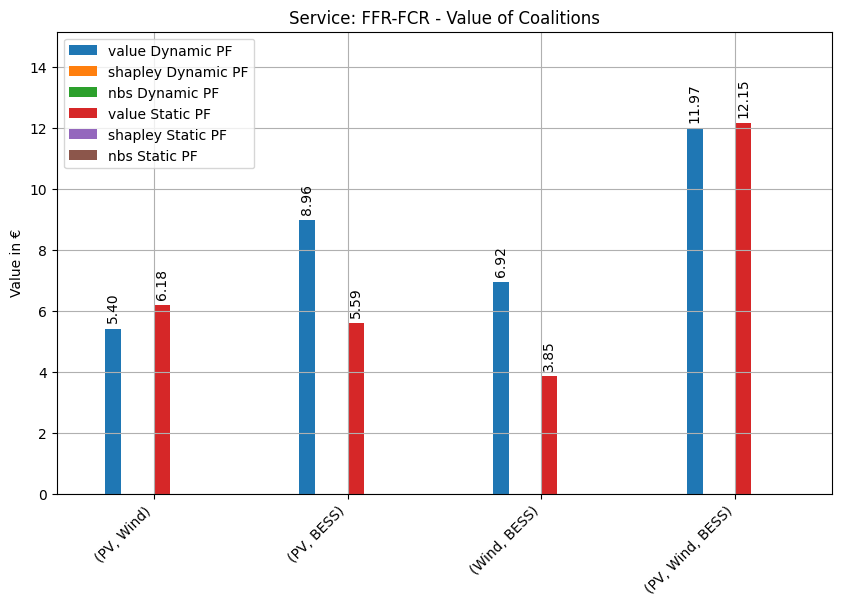

In [54]:
# visualize:
visualzie_value_results(df_new, df_newstat)

## DVPP3

no stochastic production, 1MW of
IO_dict =     {'Hydro': (get_hydro_tf(), 'lpf', 1),
                'BESS': (get_bess_io_sys(t_drop=8), 'bpf', 1),
                'SC': (get_sc_io_sys(t_drop=5), 'hpf', 1),
                }

In [290]:
# load data
df = pd.read_csv('pics/v3/values_dyn.csv', index_col=0, header=[0,1,2])
df.columns = [tuple(c for c in col if c!='nan') for col in df.columns.values]
players = [str(x[0]) for x in df.columns[:3]]
df[df < 0] = 0  # set values below zero to zero
df

,"(Hydro,)","(BESS,)","(SC,)","(Hydro, BESS)","(Hydro, SC)","(BESS, SC)","(Hydro, BESS, SC)"
FCR,0.0,0.00000,0.00000,2.41748,1.26018,0.00000,2.41748
FFR,0.0,1.59712,0.84059,2.99379,1.48073,3.16838,2.99379
FFR-FCR,0.0,0.00000,0.00000,3.57479,3.34333,0.00000,3.57479
FCR-D,0.0,0.00000,0.00000,4.50064,2.41748,0.00000,4.50064


In [291]:
# also load static pf values
dfstat = pd.read_csv('pics/v3/values_stat.csv', index_col=0, header=[0,1,2])
dfstat.columns = [tuple(c for c in col if c!='nan') for col in dfstat.columns.values]
players_stat = players
dfstat[dfstat < 0] = 0  # set values below zero to zero
dfstat

,"(Hydro,)","(BESS,)","(SC,)","(Hydro, BESS)","(Hydro, SC)","(BESS, SC)","(Hydro, BESS, SC)"
FCR,0.0,0.00000,0.00000,6.35233,6.12086,0.00000,4.26917
FFR,0.0,1.59712,0.84059,1.24795,1.24795,2.41185,1.88809
FFR-FCR,0.0,0.00000,0.00000,4.96356,3.80625,0.00000,3.80625
FCR-D,0.0,0.00000,0.00000,7.27817,7.04671,0.00000,4.96356


In [ ]:
# check convexity
for idx, row in df.iterrows():
    v = {frozenset(k): val for k, val in row.items()}
    v[frozenset()] = 0  # ensure empty coalition is present
    print(f"{idx} Shapely values: {print_2f_dict(get_shapley_value(v, players))}")
    print(f"{idx} NBS: {print_2f_dict(get_nash_bargaining_solution(v, players))}")
    is_convex_game(v, players)
    check_convexity_grand_coalition(v, players)

    # compare to static
    v_stat = {frozenset(k): val for k, val in dfstat.loc[idx].items()}
    v_stat[frozenset()] = 0  # ensure empty coalition is present
    print(f"{idx} Static PF Shapely values: {print_2f_dict(get_shapley_value(v_stat, players_stat))}")
    print(f"{idx} Static PF NBS: {print_2f_dict(get_nash_bargaining_solution(v_stat, players_stat))}")
    is_convex_game(v_stat, players_stat)
    check_convexity_grand_coalition(v_stat, players_stat)
    print('---')

FCR Shapely values: Hydro: 1.42, BESS: 0.79, SC: 0.21, 
FCR NBS: Hydro: 0.81, BESS: 0.81, SC: 0.81, 
    Game is not convex: frozenset({'Hydro', 'BESS'}), frozenset({'Hydro', 'SC'}), diff=-1.26
    Grand-Coalition Convexity holds
        Max benefit: 2.42, Min benefit: 0.00
FCR Static PF Shapely values: Hydro: 3.50, BESS: 0.44, SC: 0.33, 
FCR Static PF NBS: Hydro: 1.42, BESS: 1.42, SC: 1.42, 
    Game is not convex: frozenset({'BESS'}), frozenset({'Hydro', 'SC'}), diff=-1.85
    Game is not Grand-Coalition convex: frozenset({'BESS'}), frozenset({'Hydro', 'SC'}), diff=-1.85
---
FFR Shapely values: Hydro: 0.28, BESS: 1.92, SC: 0.79, 
FFR NBS: Hydro: 0.19, BESS: 1.78, SC: 1.03, 
    Game is not convex: frozenset({'Hydro'}), frozenset({'BESS', 'SC'}), diff=-0.17
    Game is not Grand-Coalition convex: frozenset({'Hydro'}), frozenset({'BESS', 'SC'}), diff=-0.17
FFR Static PF Shapely values: Hydro: -0.16, BESS: 1.22, SC: 0.84, 
FFR Static PF NBS: Hydro: -0.27, BESS: 1.32, SC: 0.84, 
    Game

In [293]:
df_new = add_shapely_nbs(df, players)
df_newstat = add_shapely_nbs(dfstat, players)

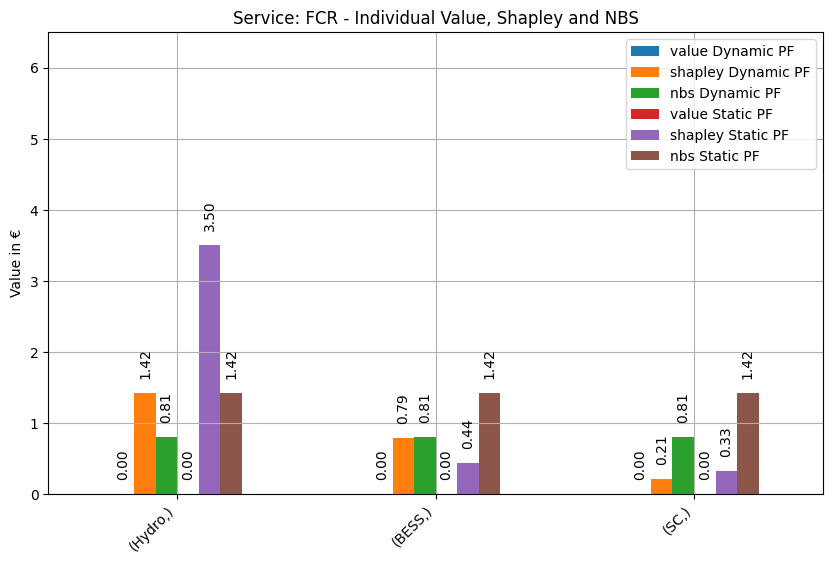

<Figure size 640x480 with 0 Axes>

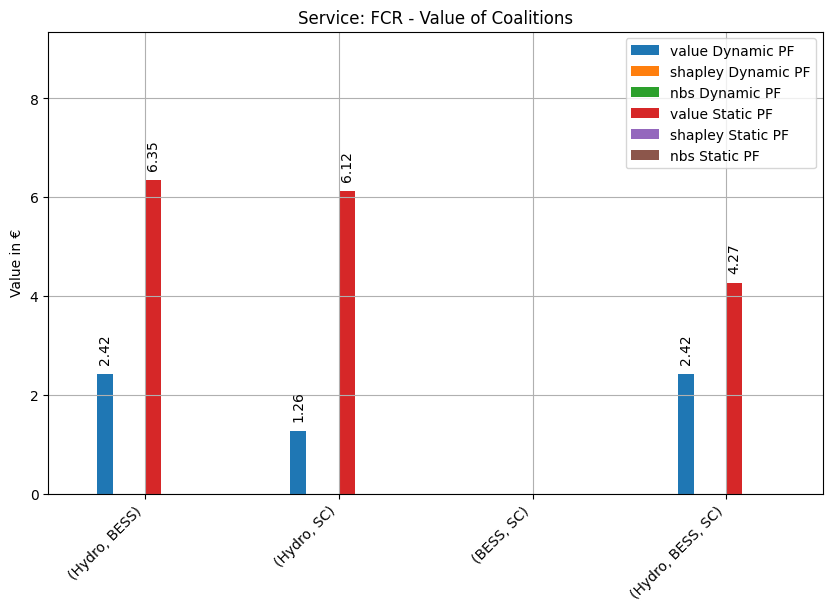

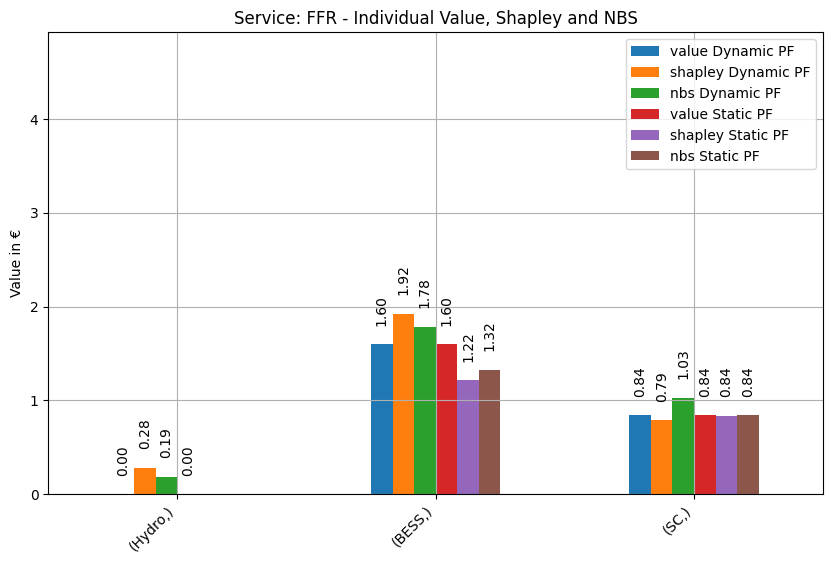

<Figure size 640x480 with 0 Axes>

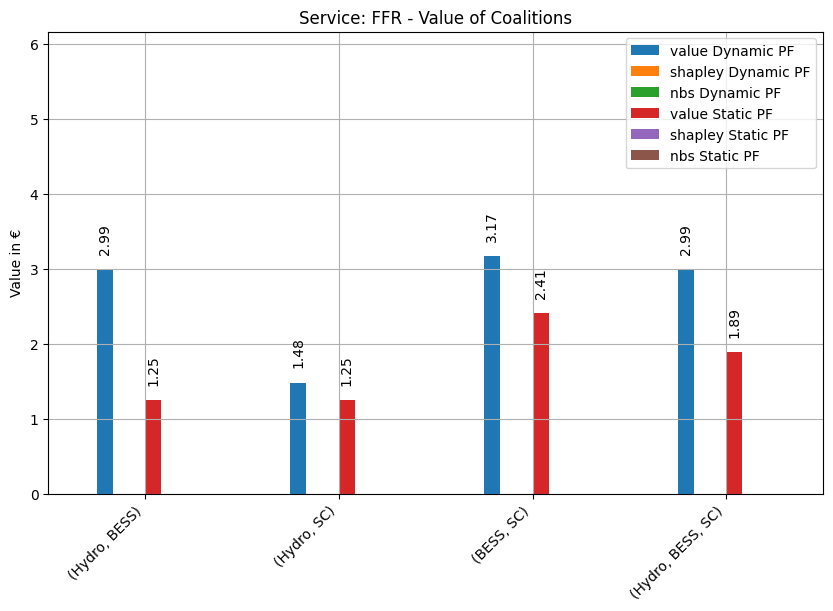

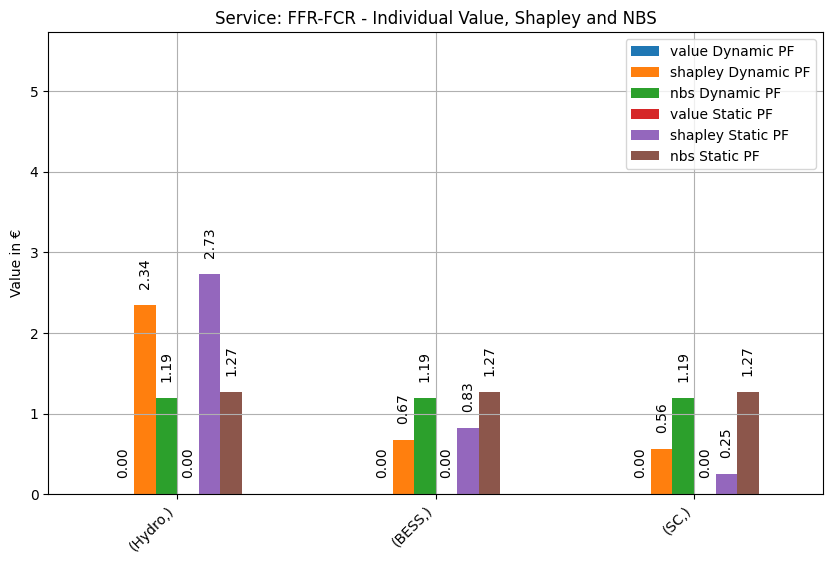

<Figure size 640x480 with 0 Axes>

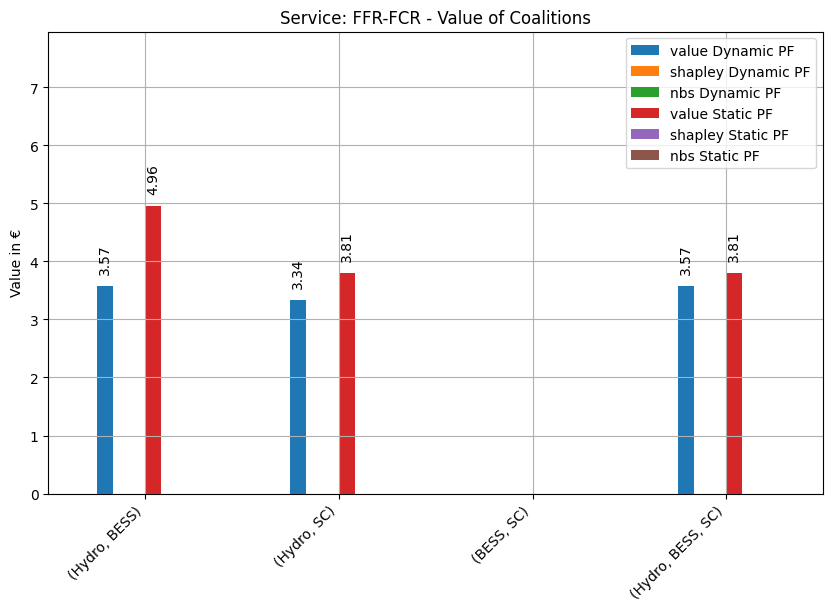

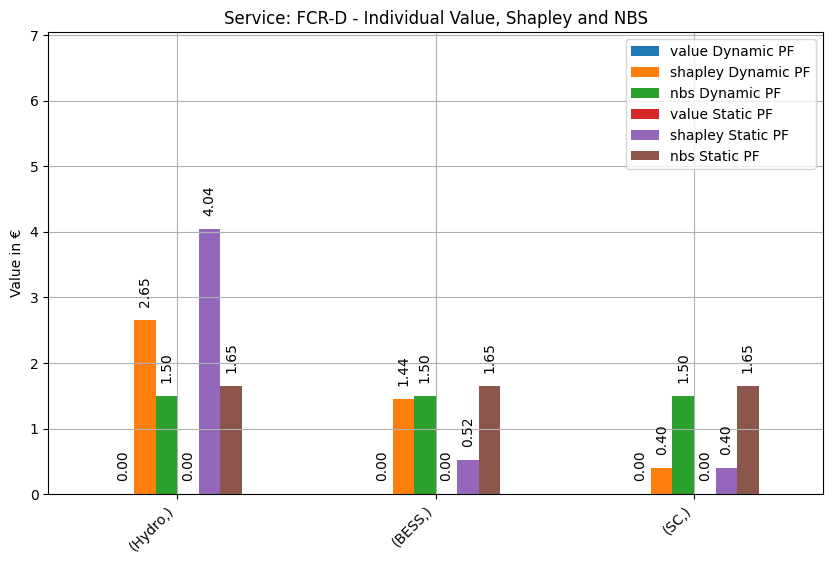

<Figure size 640x480 with 0 Axes>

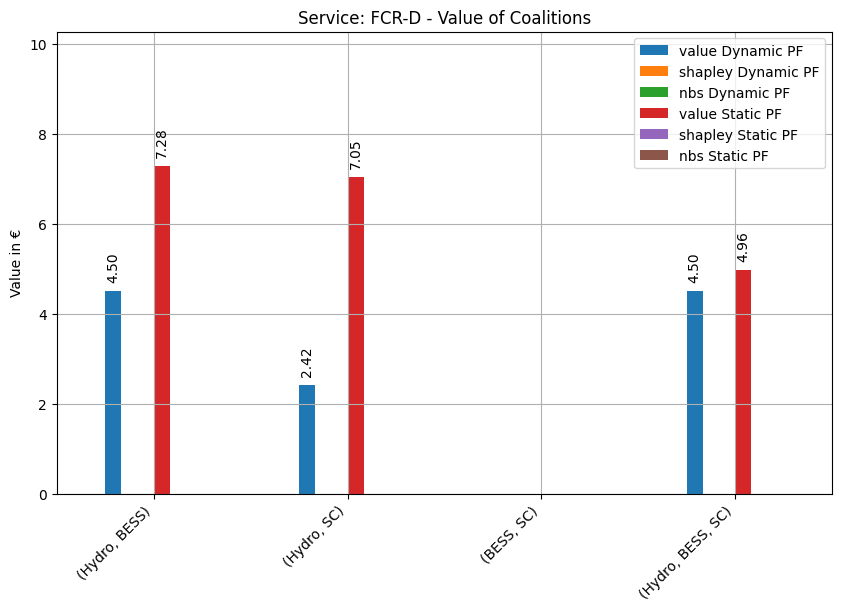

In [299]:
visualzie_value_results(df_new, df_newstat)

## DVPP2A

Using adpative dynamic PF (ADPF) with setttings 

run simulation with default parameters
    def get_io_dict():
        return {'PV': (get_pv_sys(), 'lpf', 1),
                'Wind': (get_wind_sys(), 'lpf', 1),
                'BESS': (get_bess_energy_sys(e_max=1.8), 'hpf', 1),
                }
    
    def adaptive_pv_func(t):
        return np.sin(t / 5)**2
    
    def adaptive_wind_func(t):
        return np.cos(t / 5)**2

In [98]:
# load data
# load data
# df = pd.read_csv('pics/new/values.csv', index_col=0, header=[0,1,2])
df = pd.read_csv('pics/v2A/values_dyn.csv', index_col=0, header=[0,1,2])
df.columns = [tuple(c for c in col if c!='nan') for col in df.columns.values]

df[df < 0] = 0  # set values below zero to zero
df

,"(PV,)","(Wind,)","(BESS,)","(PV, Wind)","(PV, BESS)","(Wind, BESS)","(PV, Wind, BESS)"
FCR,3.57479,3.57479,0.00000,11.31588,12.13886,11.67593,17.79680
FFR,1.01517,0.89878,3.16838,1.09923,3.11018,3.11018,4.24174
FFR-FCR,3.57479,3.57479,0.00000,4.37205,12.13886,3.57479,16.87095
FCR-D,4.26917,4.26917,0.00000,14.09342,5.19502,4.26917,21.03726


In [99]:
df_new = add_shapely_nbs(df, players, add_LOO=True)

In [100]:
# check convexity
for idx, row in df.iterrows():
    v = {frozenset(k): val for k, val in row.items()}
    v[frozenset()] = 0  # ensure empty coalition is present
    # print(f"{idx} LOO: {print_2f_dict(get_loo(v, players))}")
    # print(f"{idx} Shapely values: {print_2f_dict(get_shapley_value(v, players))}")
    # print(f"{idx} NBS: {print_2f_dict(get_nash_bargaining_solution(v, players))}")
    print(f"{idx} - Convexity")
    is_convex_game(v, players)
    check_convexity_grand_coalition(v, players)

FCR - Convexity
Game is not convex: frozenset({'PV', 'Wind'}), frozenset({'PV', 'BESS'})
    Grand-Coalition Convexity holds
        Max benefit: 6.48, Min benefit: 2.08
FFR - Convexity
Game is not convex: frozenset({'PV'}), frozenset({'Wind'})
    Grand-Coalition Convexity holds
        Max benefit: 0.23, Min benefit: -0.03
FFR-FCR - Convexity
Game is not convex: frozenset({'PV'}), frozenset({'Wind'})
    Grand-Coalition Convexity holds
        Max benefit: 12.50, Min benefit: 1.16
FCR-D - Convexity
    Grand-Coalition Convexity holds
        Max benefit: 12.50, Min benefit: 6.94


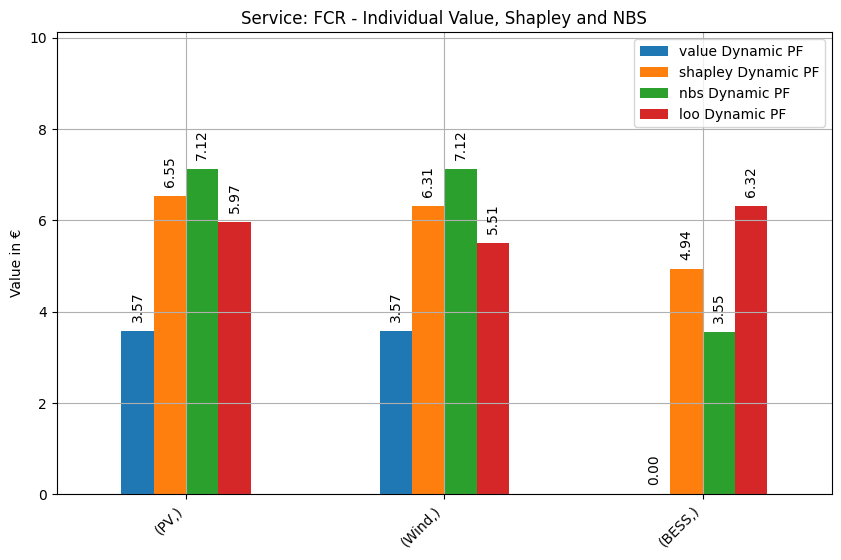

<Figure size 640x480 with 0 Axes>

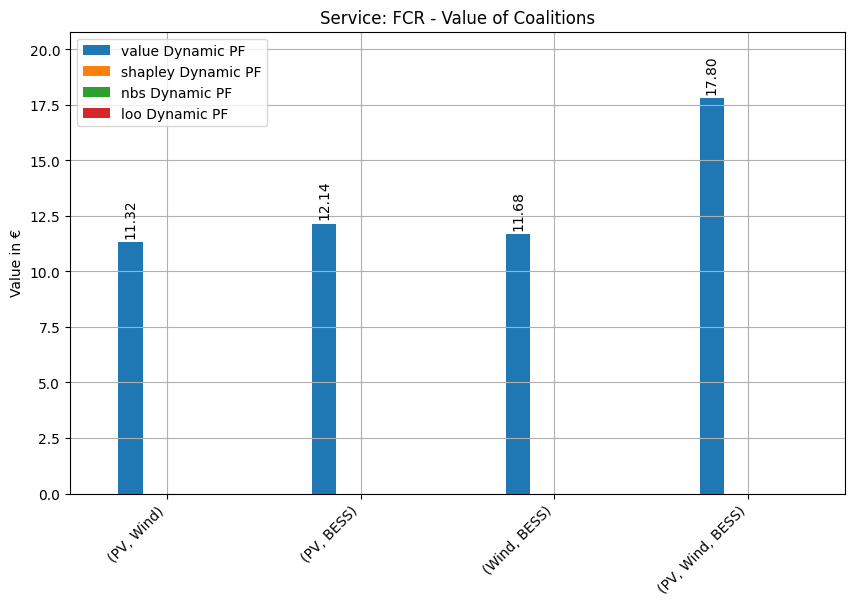

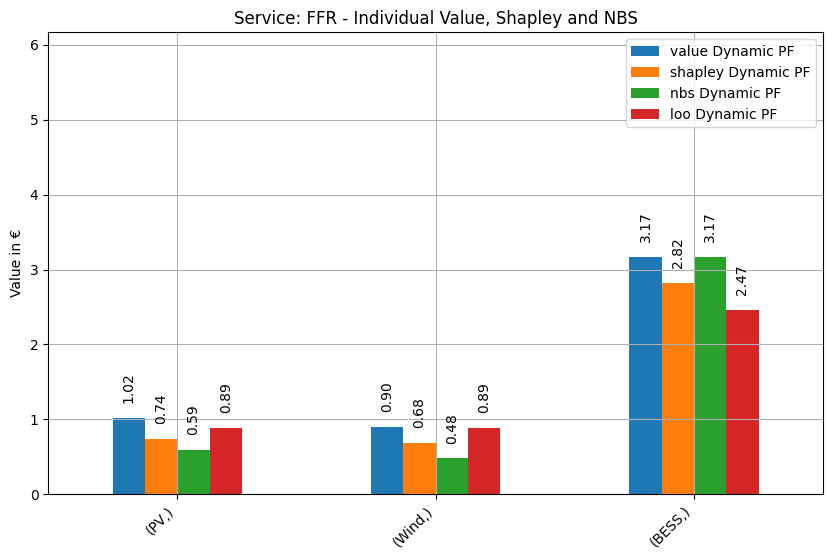

<Figure size 640x480 with 0 Axes>

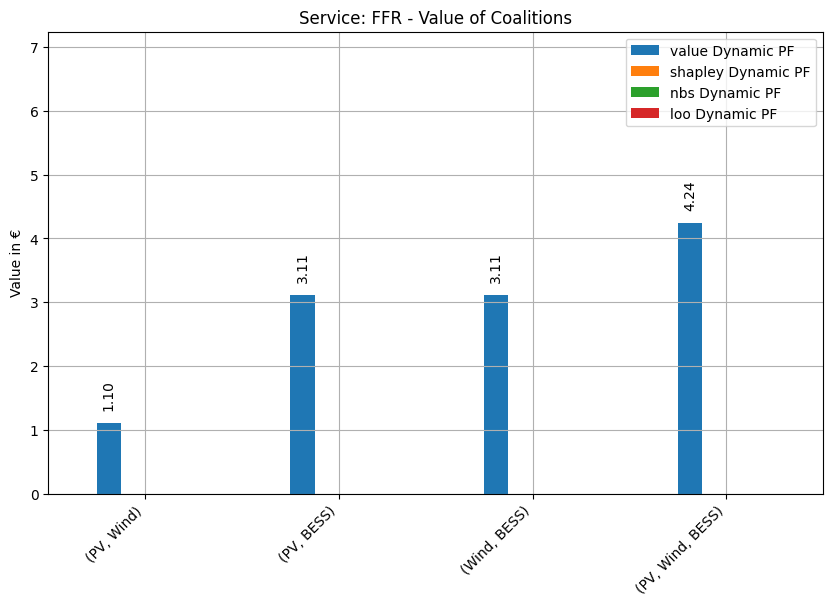

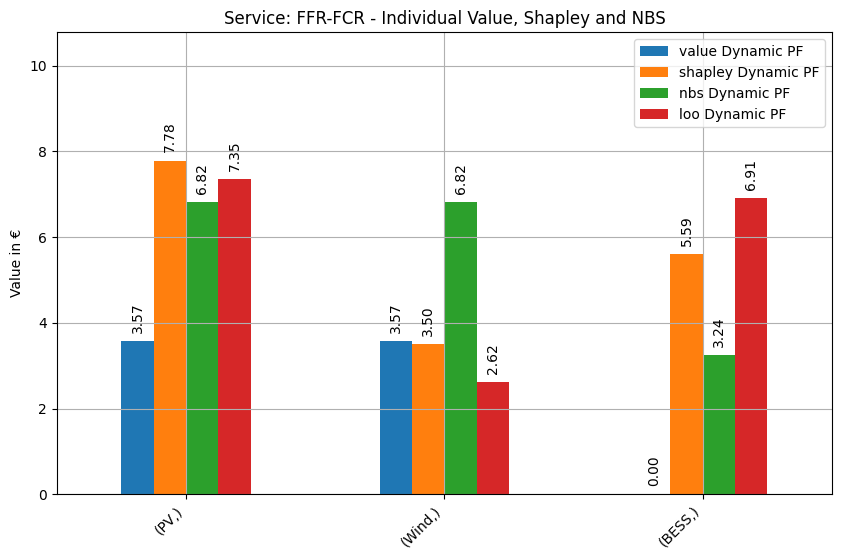

<Figure size 640x480 with 0 Axes>

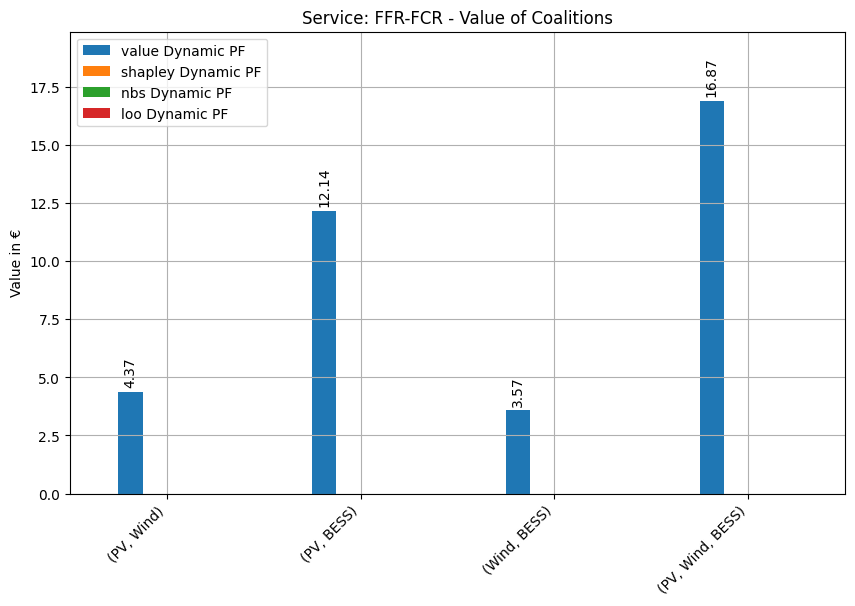

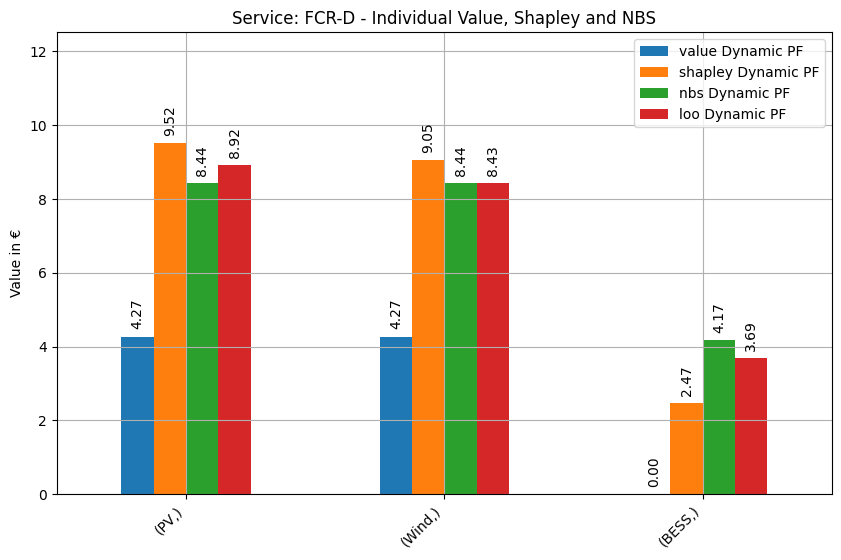

<Figure size 640x480 with 0 Axes>

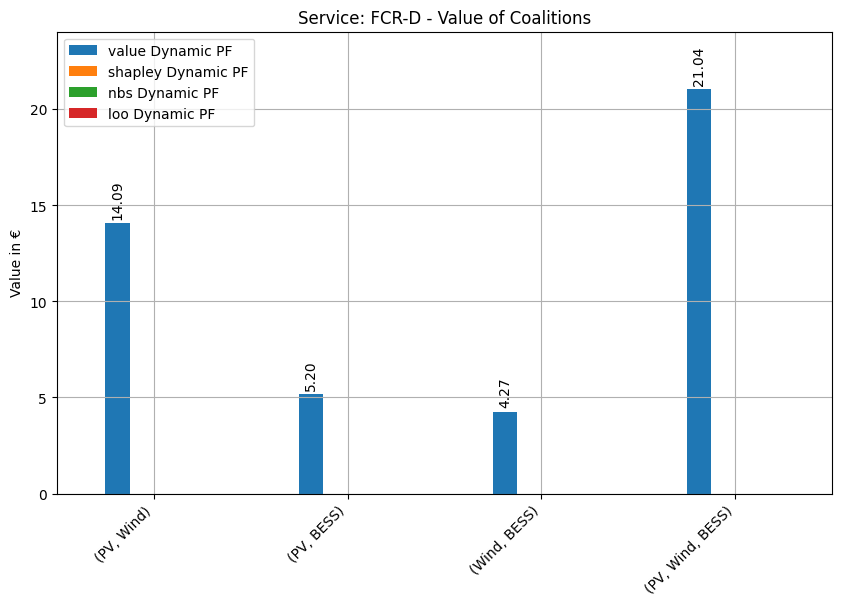

In [101]:
visualzie_value_results(df_new, None)